In [59]:
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
from polygon import RESTClient
import talib
from polygon_keys import polygon_key

In [60]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.family'] = 'serif'

In [61]:
def get_data_by_hour(symbol):
    key = polygon_key
    client = RESTClient(key)
    query = True
    from_date = "2012-01-01"
    to_date = (datetime.today().date() + timedelta(days = 1)).strftime("%Y-%m-%d")
    now_date = datetime.today().date().strftime("%Y-%m-%d")
    data_for_df = []
    while query:
        print(from_date, now_date)
        resp = client.stocks_equities_aggregates(symbol, 1, "hour", from_date, to_date, unadjusted=True, limit=50000)
        if 'results' in dir(resp):
            results = resp.results
            data_for_df = data_for_df + results[:-1]
            date = datetime.fromtimestamp((resp.results[-1]['t'])/1000.0)
            from_date = date.date().strftime("%Y-%m-%d")
            print(from_date == now_date)
            if from_date == now_date:
                query = False 
        else:
            query = False 

    
    handledData = pd.DataFrame(data=data_for_df)
    handledData.columns = ['volume', 'vw', 'open', 'close', 'high', 'low', 'time', 'number']
    handledData.drop_duplicates(subset=['time'], inplace=True)
    handledData.index = pd.to_datetime(handledData['time'].values, unit='ms').to_pydatetime()
    handledData.index = handledData.index + timedelta(hours = 3)
    handledData.drop('time', axis=1, inplace=True)
    handledData.dropna(inplace=True)

    plt.figure(figsize=(15, 5))
    plt.plot(handledData.index, handledData['close'])
    plt.grid(True)
    return handledData

2012-01-01 2021-05-29
False
2012-04-19 2021-05-29
False
2012-08-09 2021-05-29
False
2012-11-29 2021-05-29
False
2013-03-19 2021-05-29
False
2013-07-18 2021-05-29
False
2013-11-06 2021-05-29
False
2014-03-12 2021-05-29
False
2014-07-15 2021-05-29
False
2014-10-22 2021-05-29
False
2015-02-06 2021-05-29
False
2015-05-19 2021-05-29
False
2015-08-28 2021-05-29
False
2015-12-14 2021-05-29
False
2016-04-07 2021-05-29
False
2016-08-03 2021-05-29
False
2016-12-02 2021-05-29
False
2017-04-12 2021-05-29
False
2017-08-14 2021-05-29
False
2017-12-07 2021-05-29
False
2018-03-29 2021-05-29
False
2018-07-26 2021-05-29
False
2018-11-07 2021-05-29
False
2019-02-25 2021-05-29
False
2019-06-14 2021-05-29
False
2019-10-03 2021-05-29
False
2020-01-21 2021-05-29
False
2020-04-20 2021-05-29
False
2020-07-28 2021-05-29
False
2020-10-17 2021-05-29
False
2021-01-12 2021-05-29
False
2021-04-06 2021-05-29
True


,volume,vw,open,close,high,low,number
2012-01-03 12:00:00,4179.0,409.5173,404.8000,412.8000,412.80,404.8000,16
2012-01-03 13:00:00,1965.0,411.3824,412.6500,411.3300,412.65,411.0000,15
2012-01-03 14:00:00,5138.0,411.0556,411.3300,410.5000,412.00,410.4700,21
2012-01-03 15:00:00,24959.0,409.8962,410.9900,409.6200,410.99,409.5500,136
2012-01-03 16:00:00,119362.0,408.0616,410.5000,408.5000,410.50,405.0000,515
...,...,...,...,...,...,...,...
2021-05-28 21:00:00,5555575.0,125.0000,124.8800,125.0782,125.14,124.8118,41542
2021-05-28 22:00:00,13615951.0,124.9053,125.0750,124.6100,125.17,124.5500,101017
2021-05-28 23:00:00,1300112.0,124.6190,124.6100,124.5700,124.82,124.5200,5044
2021-05-29 00:00:00,123593.0,124.5874,124.5800,124.6500,124.67,124.5700,2289


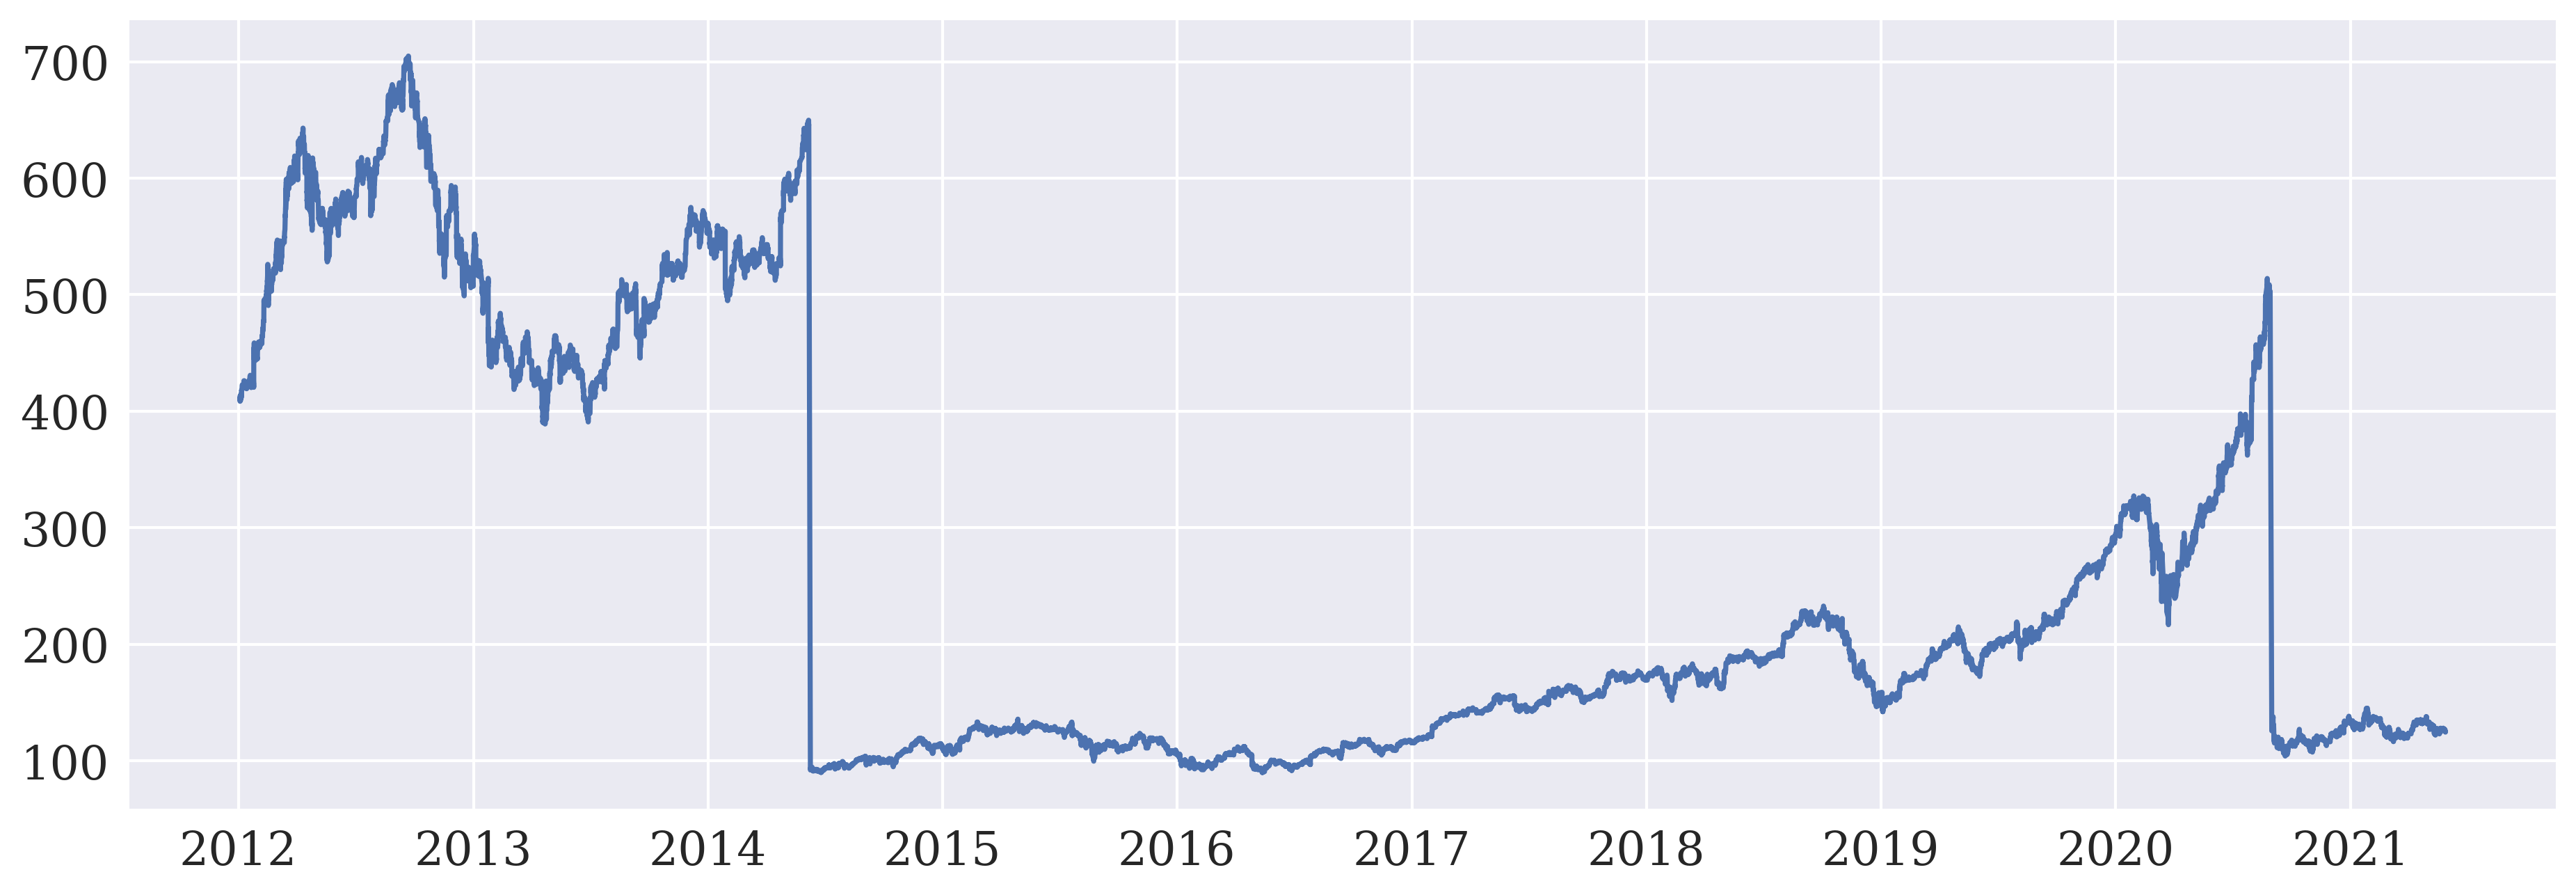

In [62]:
data_stock = get_data_by_hour("AAPL")
data_stock

2012-01-03 12:00:00           NaN
2012-01-03 13:00:00           NaN
2012-01-03 14:00:00           NaN
2012-01-03 15:00:00           NaN
2012-01-03 16:00:00           NaN
                          ...    
2021-05-28 21:00:00    126.423518
2021-05-28 22:00:00    126.378118
2021-05-28 23:00:00    126.336318
2021-05-29 00:00:00    126.290518
2021-05-29 01:00:00    126.245518
Length: 37357, dtype: float64


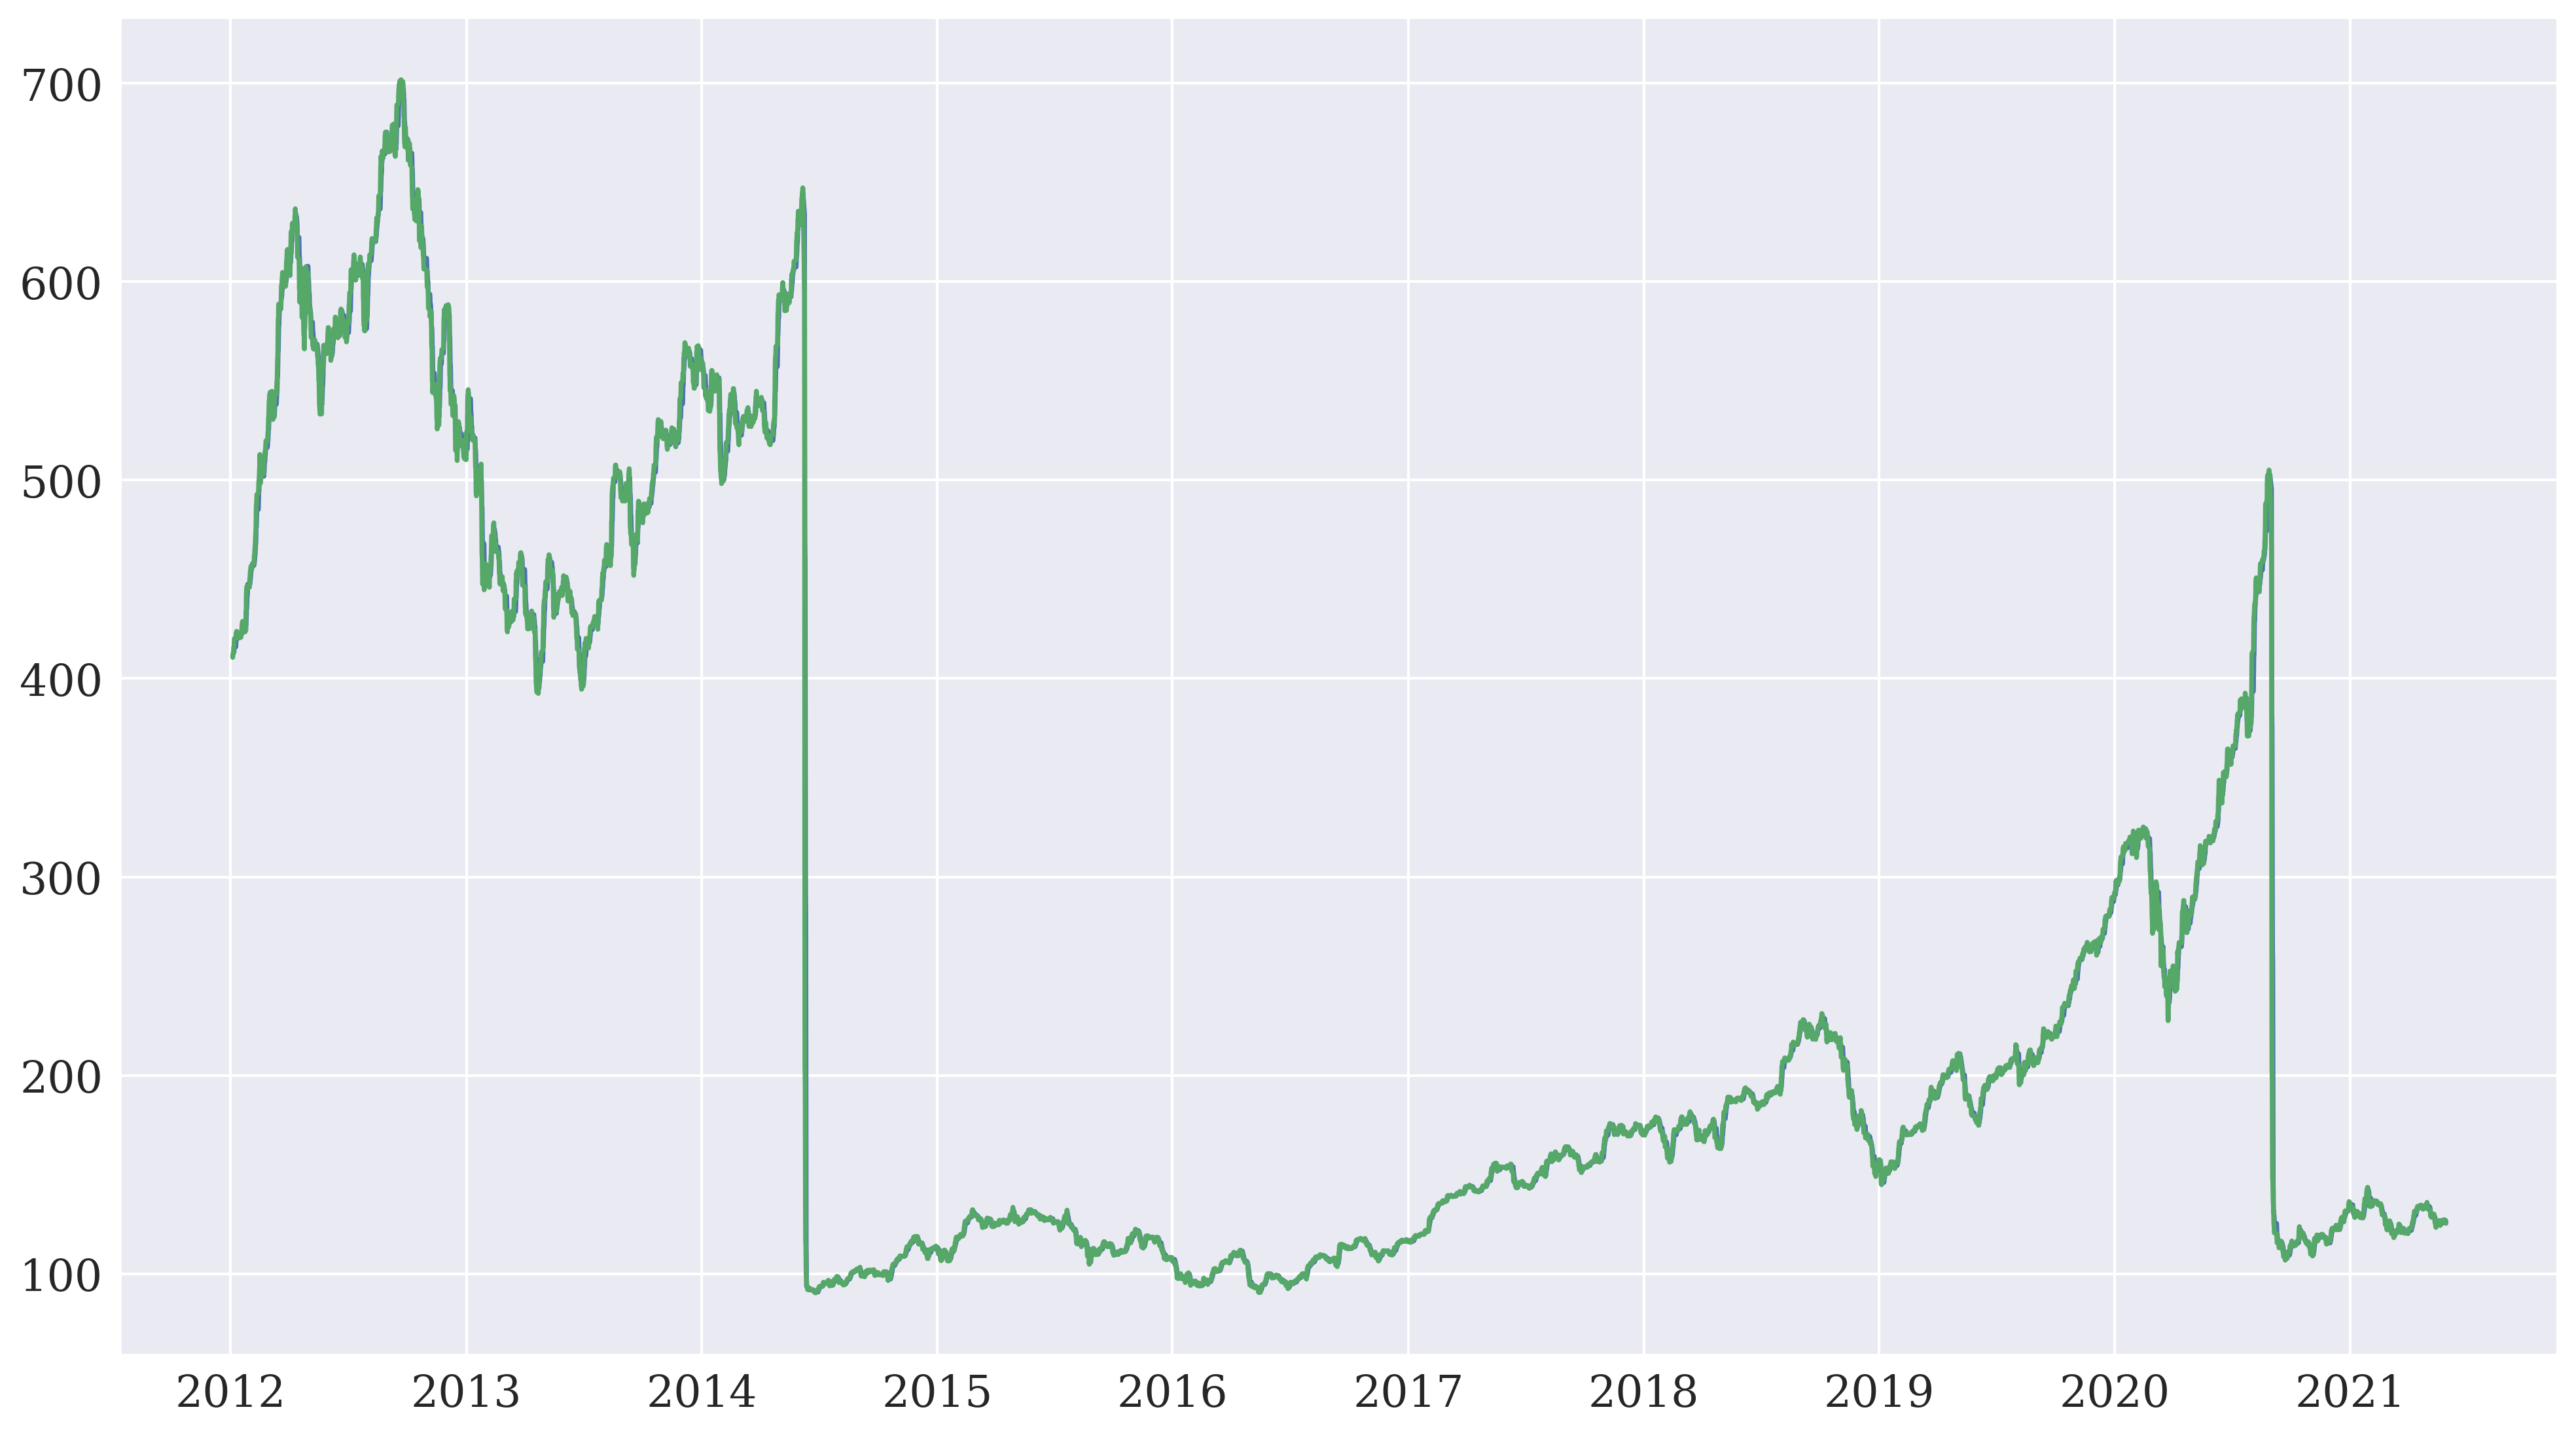

In [5]:
sma = talib.SMA(data_stock['close'], timeperiod=50)
print(sma)

fig,ax = plt.subplots()

ax.plot(sma)


ema = talib.EMA(data_stock['close'], timeperiod=20)

ax.plot(ema)



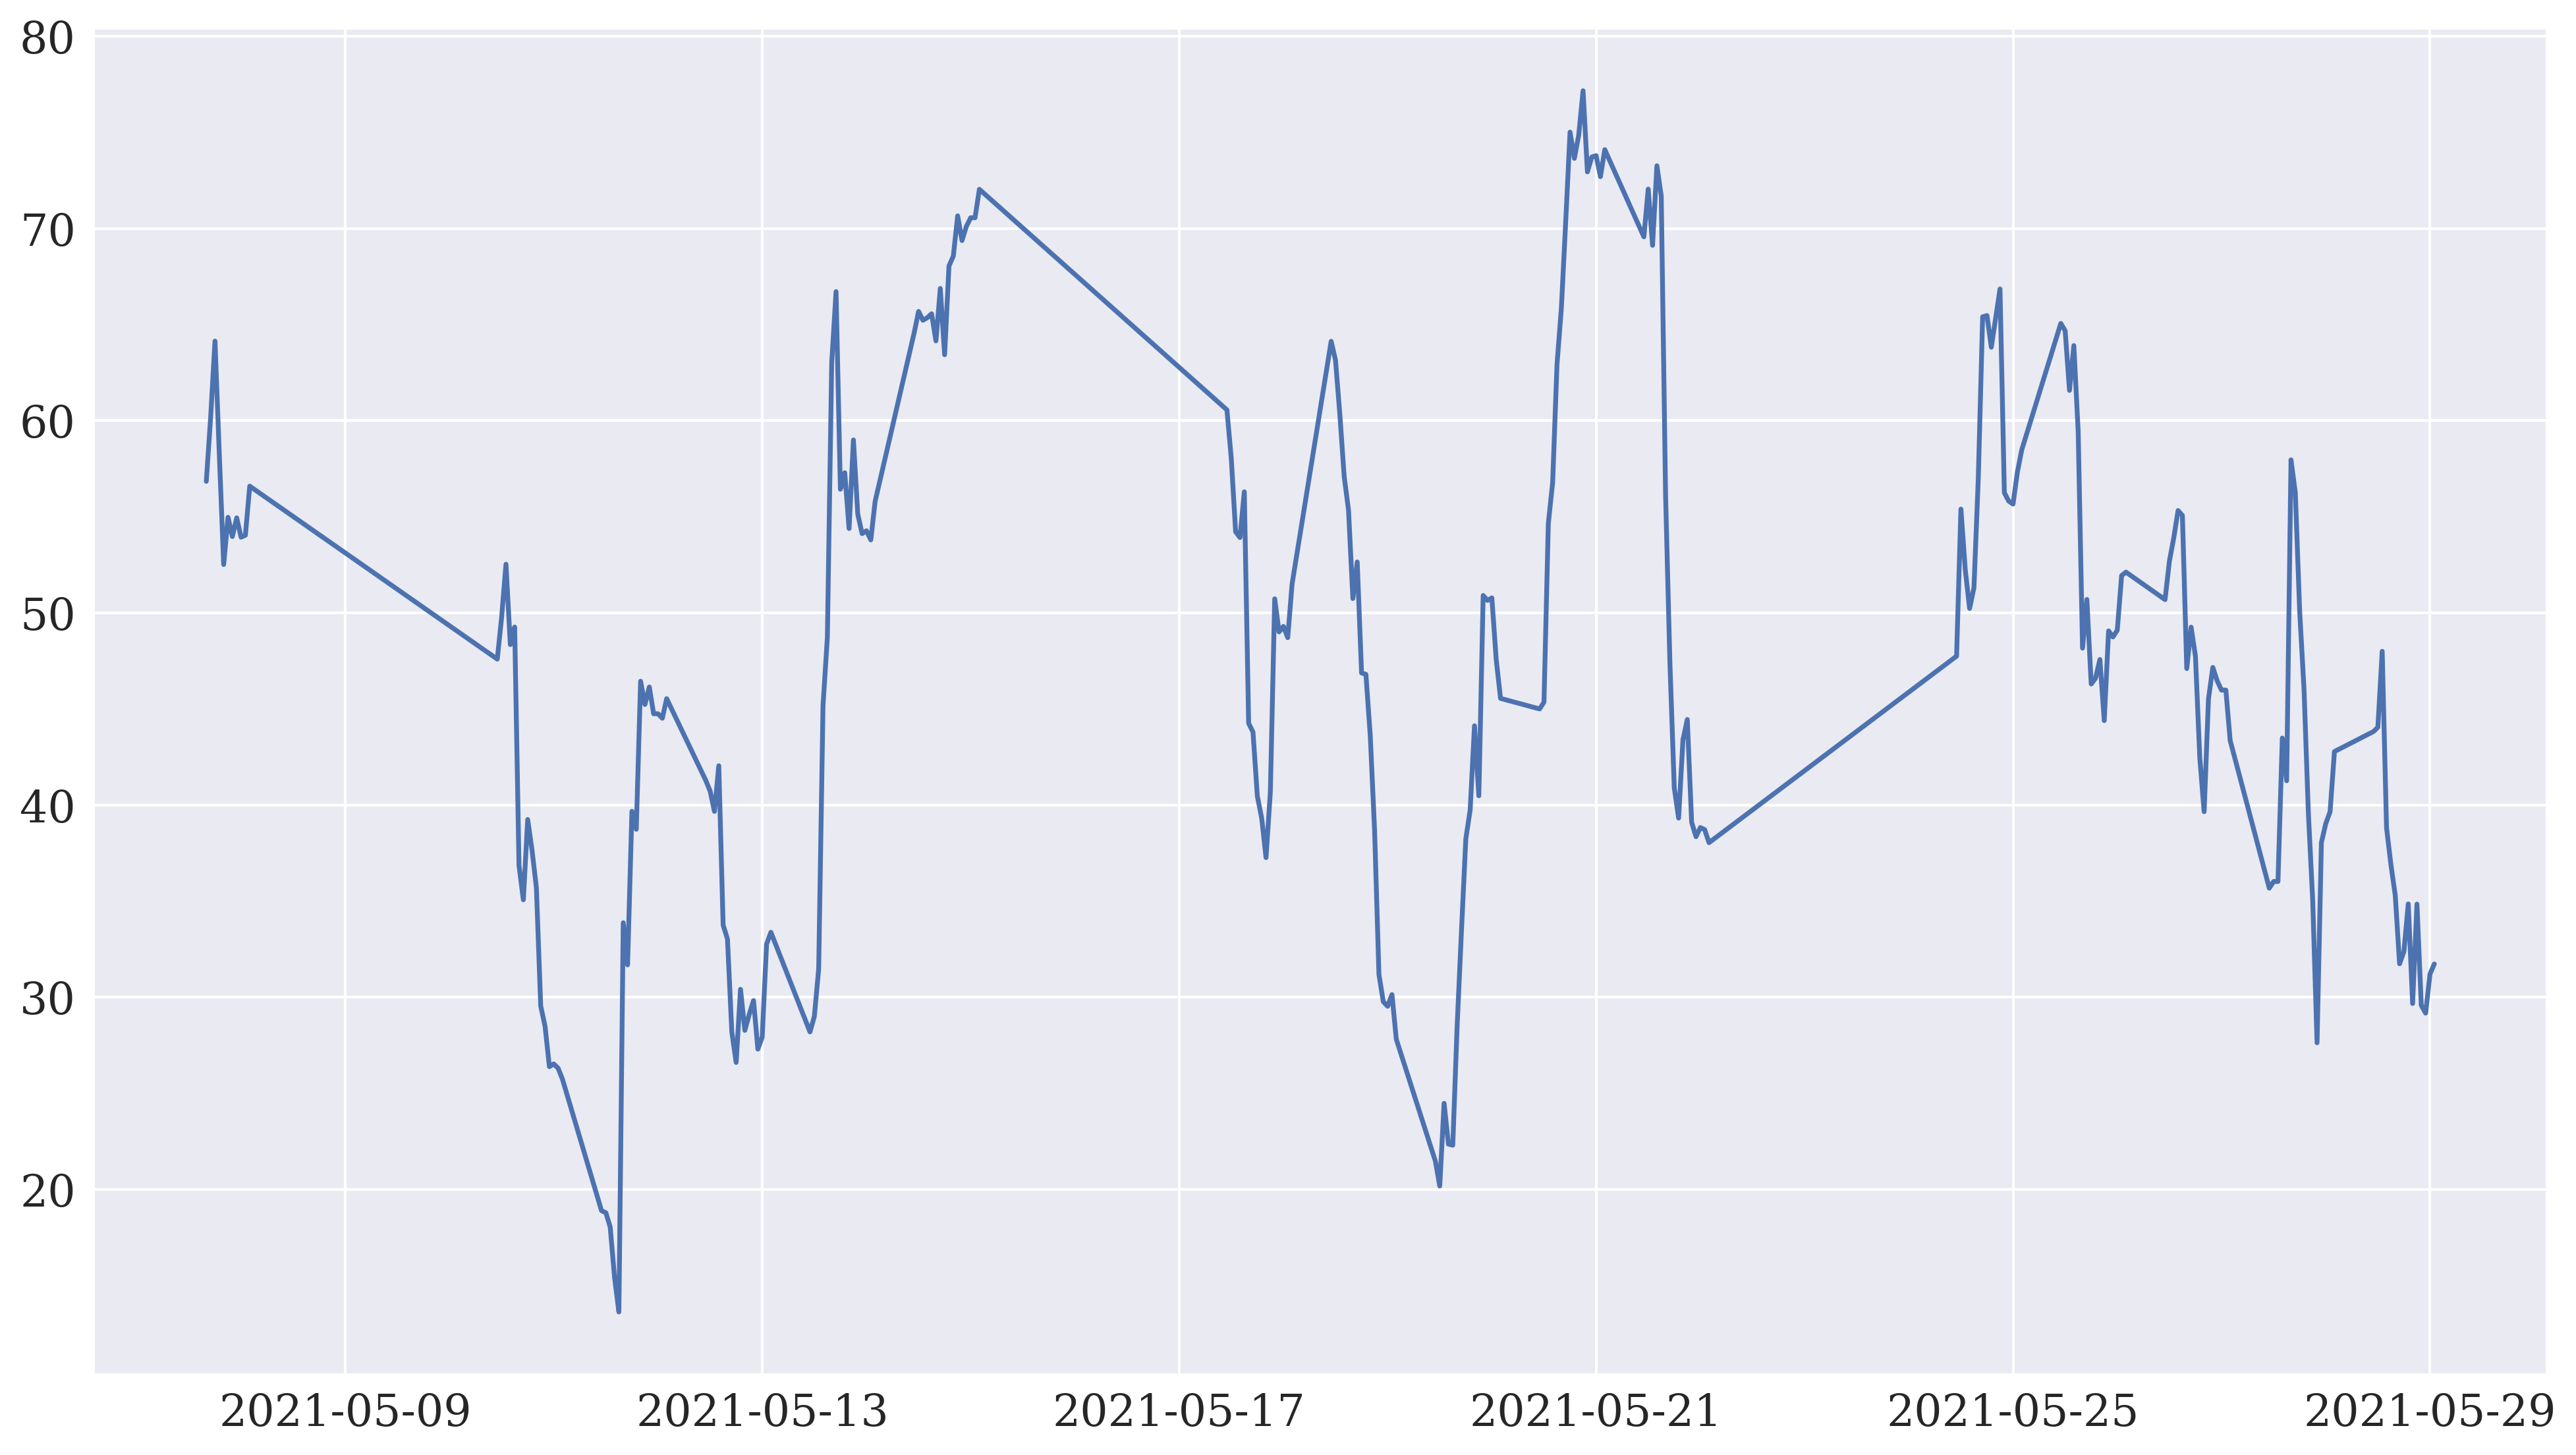

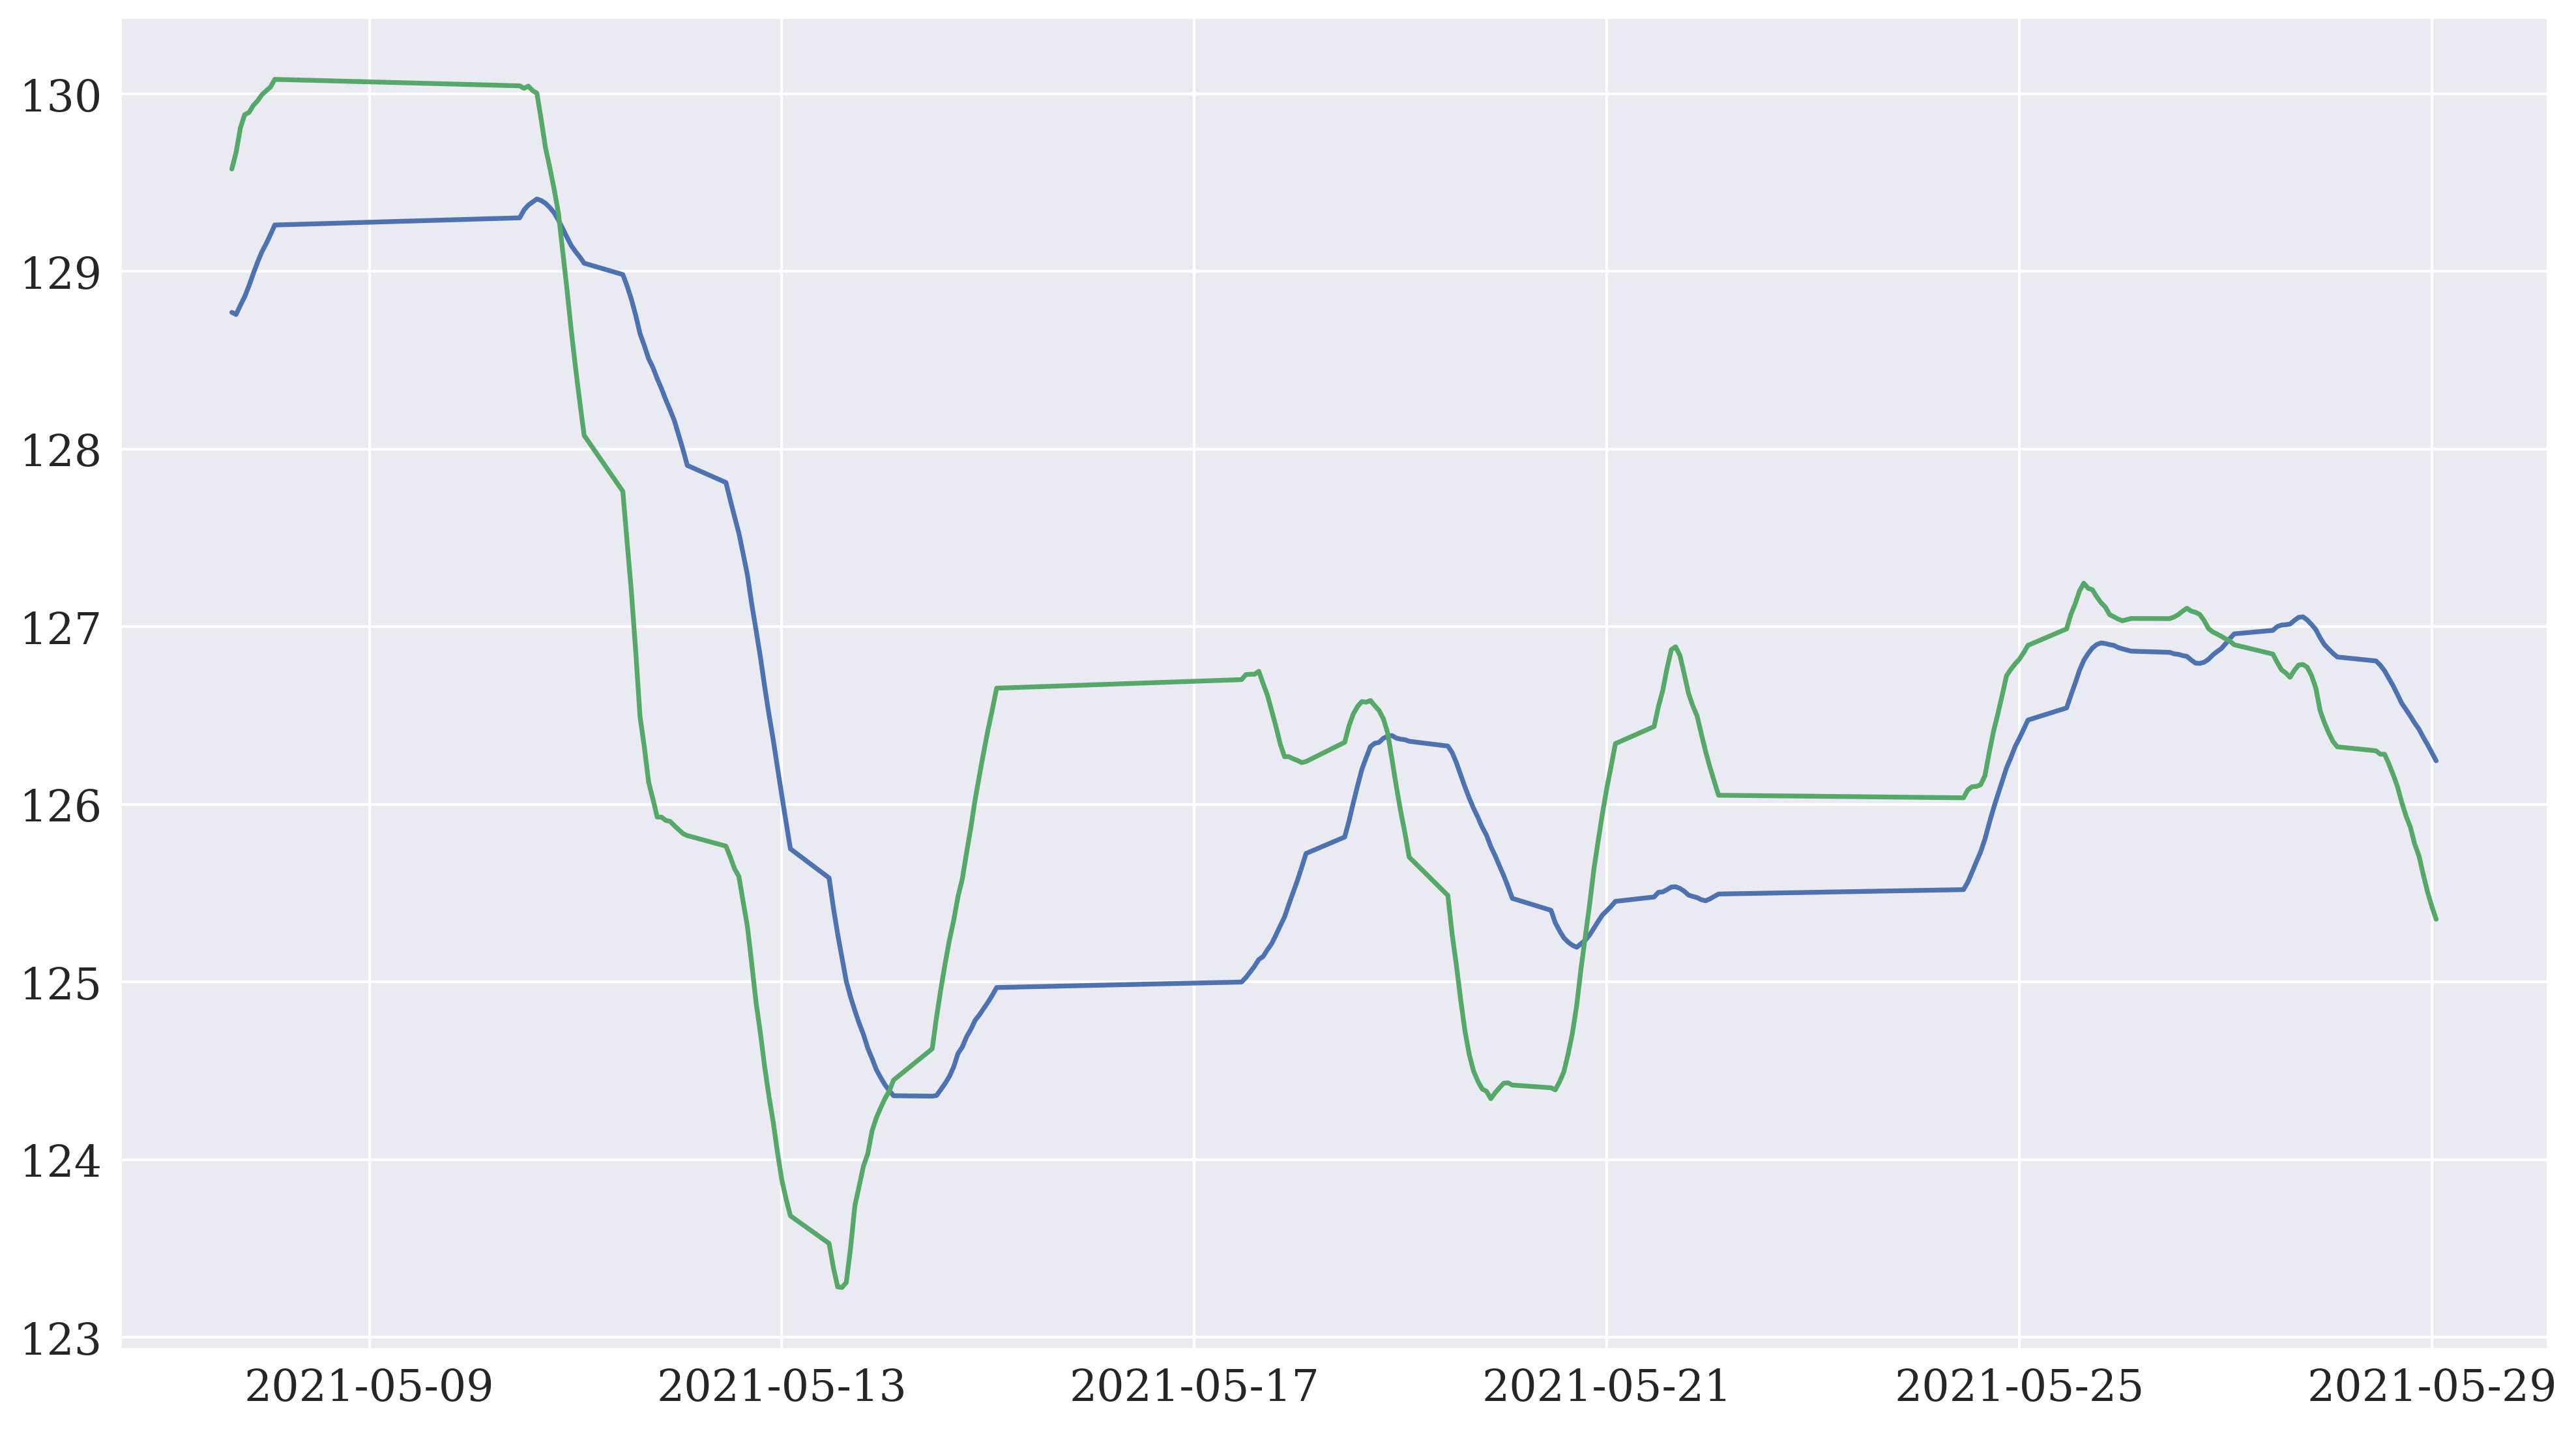

In [6]:
rsi = talib.RSI(data_stock['close'])
rsi

fig,ax = plt.subplots()

ax.plot(rsi[-250:])

fig,ax = plt.subplots()

ax.plot(sma[-250:])
ax.plot(ema[-250:])


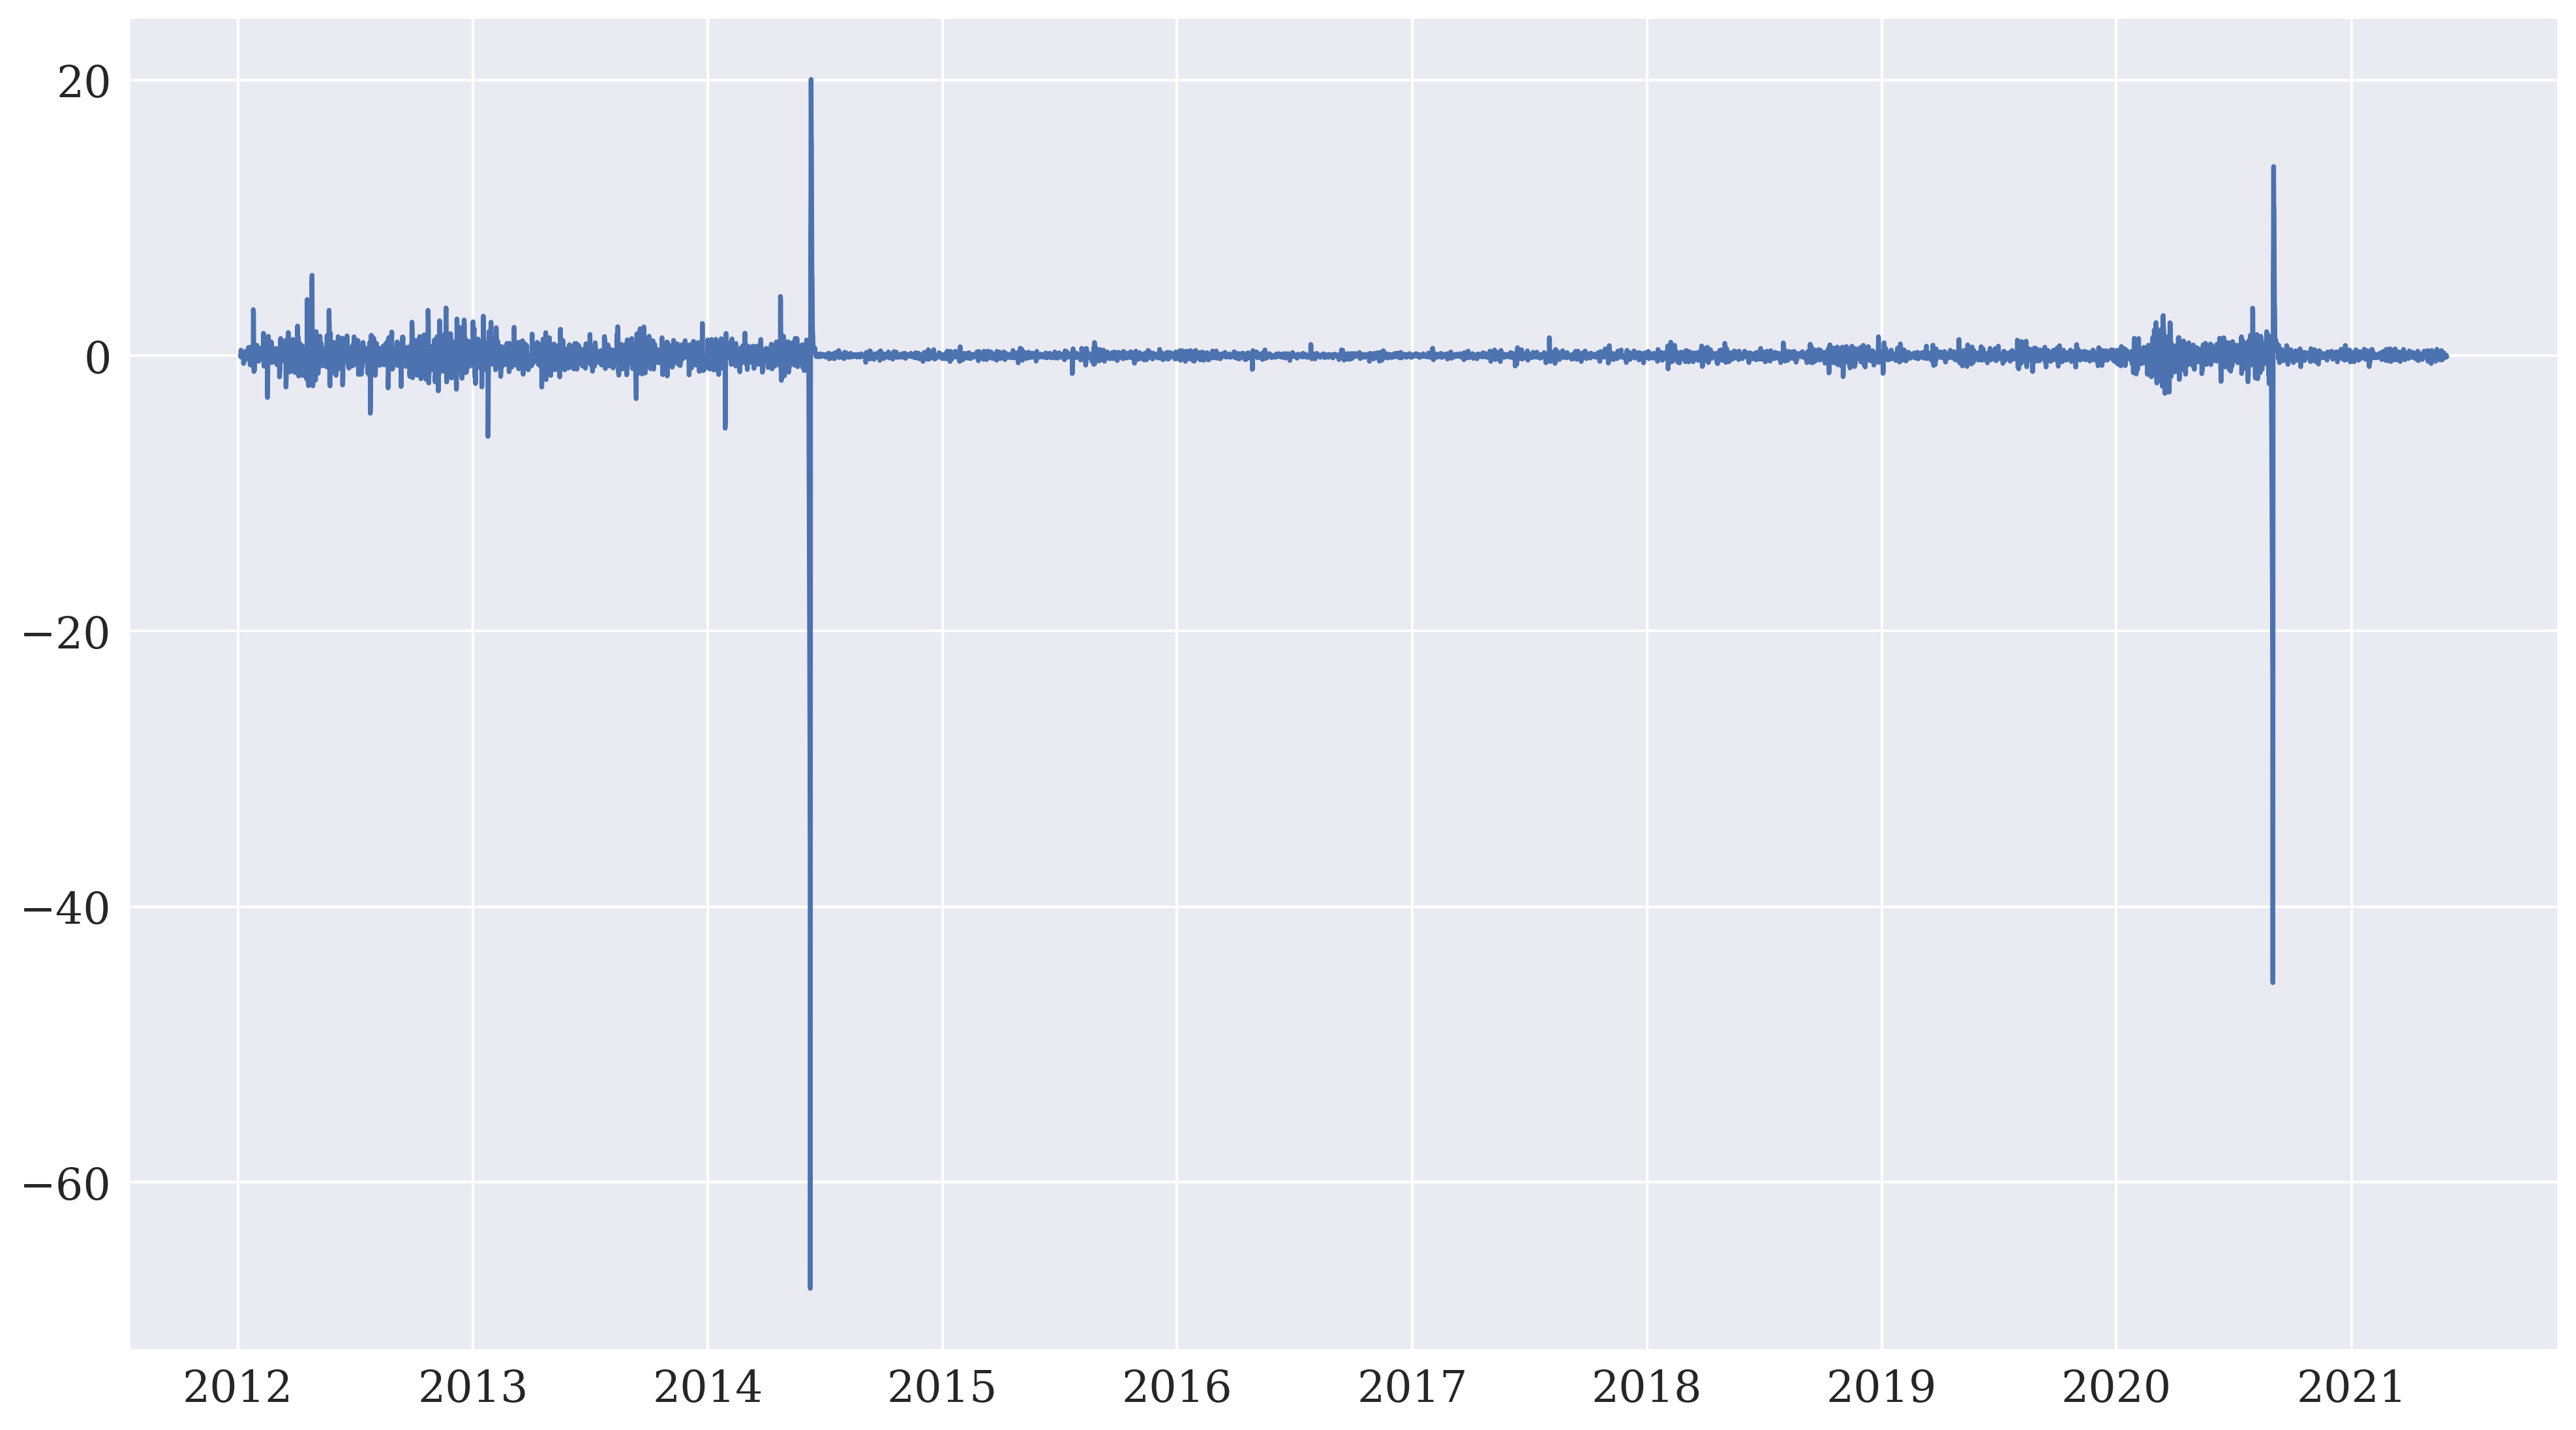

In [7]:
macd, macdsignal, macdhist = talib.MACD(data_stock['close'], fastperiod=12, slowperiod=26, signalperiod=9)
macdhist

fig,ax = plt.subplots()

ax.plot(macdhist)

In [8]:
price = data_stock['close']


def get_Daily_Volatility(close,span0=24):
    # simple percentage returns
    df0=close.pct_change()
    # 20 days, a month EWM's std as boundary
    df0=df0.ewm(span=span0).std()
    df0.dropna(inplace=True)
    return df0
df0 = get_Daily_Volatility(price)

#set the boundary of barriers, based on 20 days EWM
daily_volatility = get_Daily_Volatility(price)
# how many days we hold the stock which set the vertical barrier
t_final = 10 
#the up and low boundary multipliers
upper_lower_multipliers = [3, 2]
#allign the index
prices = price[daily_volatility.index]

def get_3_barriers():
    #create a container
    barriers = pd.DataFrame(columns=['days_passed', 'price', 'vert_barrier', 'top_barrier', 'bottom_barrier'], index = daily_volatility.index)
    for day, vol in daily_volatility.iteritems():
        days_passed = len(daily_volatility.loc[daily_volatility.index[0] : day])
        #set the vertical barrier 
        if (days_passed + t_final < len(daily_volatility.index) \
            and t_final != 0):
            vert_barrier = daily_volatility.index[
                                days_passed + t_final]
        else:
            vert_barrier = np.nan
        #set the top barrier
        if upper_lower_multipliers[0] > 0:
            top_barrier = prices.loc[day] + prices.loc[day] * \
                          upper_lower_multipliers[0] * vol
        else:
            #set it to NaNs
            top_barrier = pd.Series(index=prices.index)
        #set the bottom barrier
        if upper_lower_multipliers[1] > 0:
            bottom_barrier = prices.loc[day] - prices.loc[day] * \
                          upper_lower_multipliers[1] * vol
        else: 
            #set it to NaNs
            bottom_barrier = pd.Series(index=prices.index)
        barriers.loc[day, ['days_passed', 'price', \
        'vert_barrier','top_barrier', 'bottom_barrier']] = \
         days_passed, prices.loc[day], vert_barrier, \
         top_barrier, bottom_barrier
    barriers['out'] = None
    return barriers


barriers = get_3_barriers()

def get_labels():
    for i in range(len(barriers.index)):
        start = barriers.index[i]
        end = barriers.vert_barrier[i]
        if pd.notna(end):
                # assign the initial and final price
                price_initial = barriers.price[start]
                price_final = barriers.price[end]
    # assign the top and bottom barriers
                top_barrier = barriers.top_barrier[i]
                bottom_barrier = barriers.bottom_barrier[i]
    #set the profit taking and stop loss conditons
                condition_pt = (barriers.price[start: end] >= \
                 top_barrier).any()
                condition_sl = (barriers.price[start: end] <= \
                 bottom_barrier).any()
    #assign the labels
                if condition_pt: 
                    barriers['out'][i] = 1
                elif condition_sl: 
                    barriers['out'][i] = -1    
                else: 
                    barriers['out'][i] = 0
    return

get_labels()

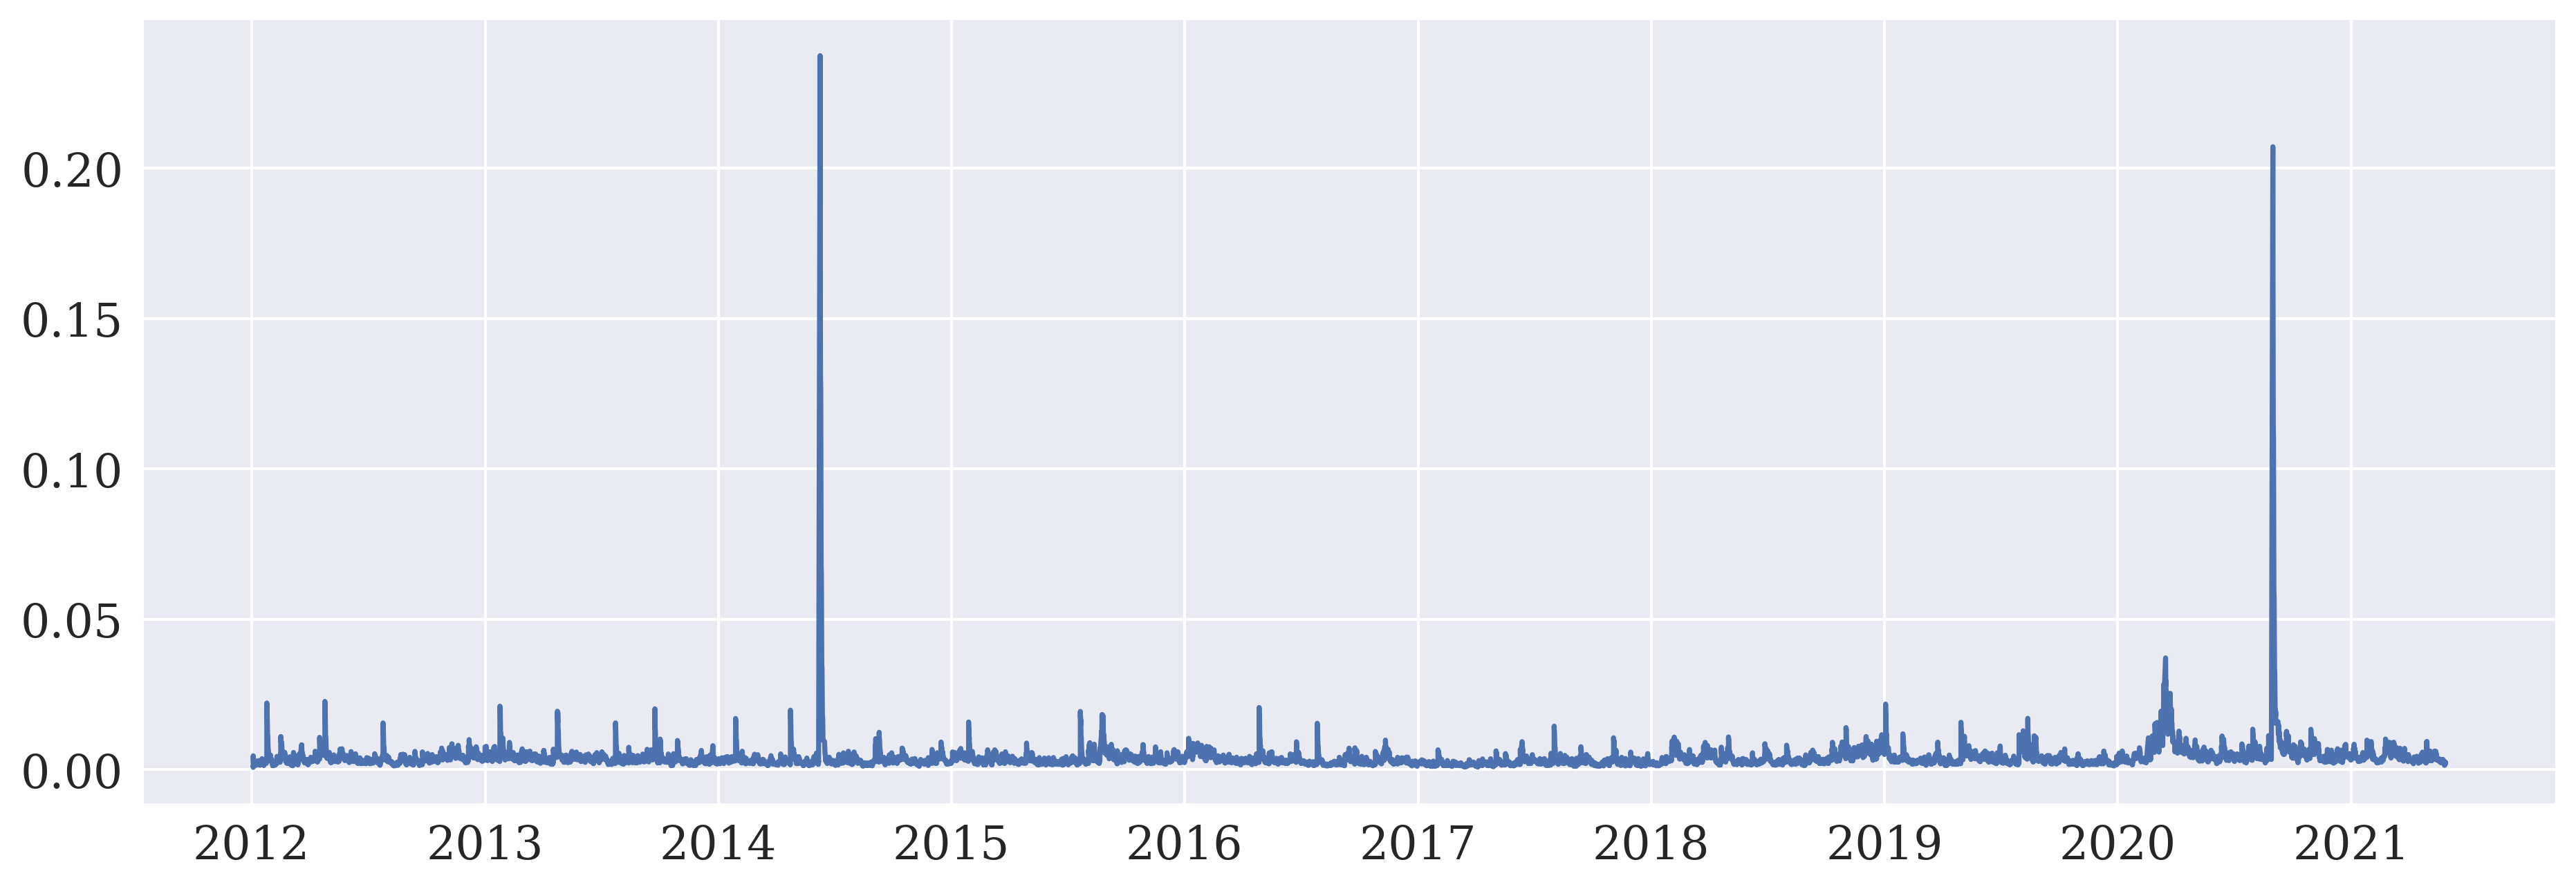

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df0.index, df0.values)
plt.grid(True)

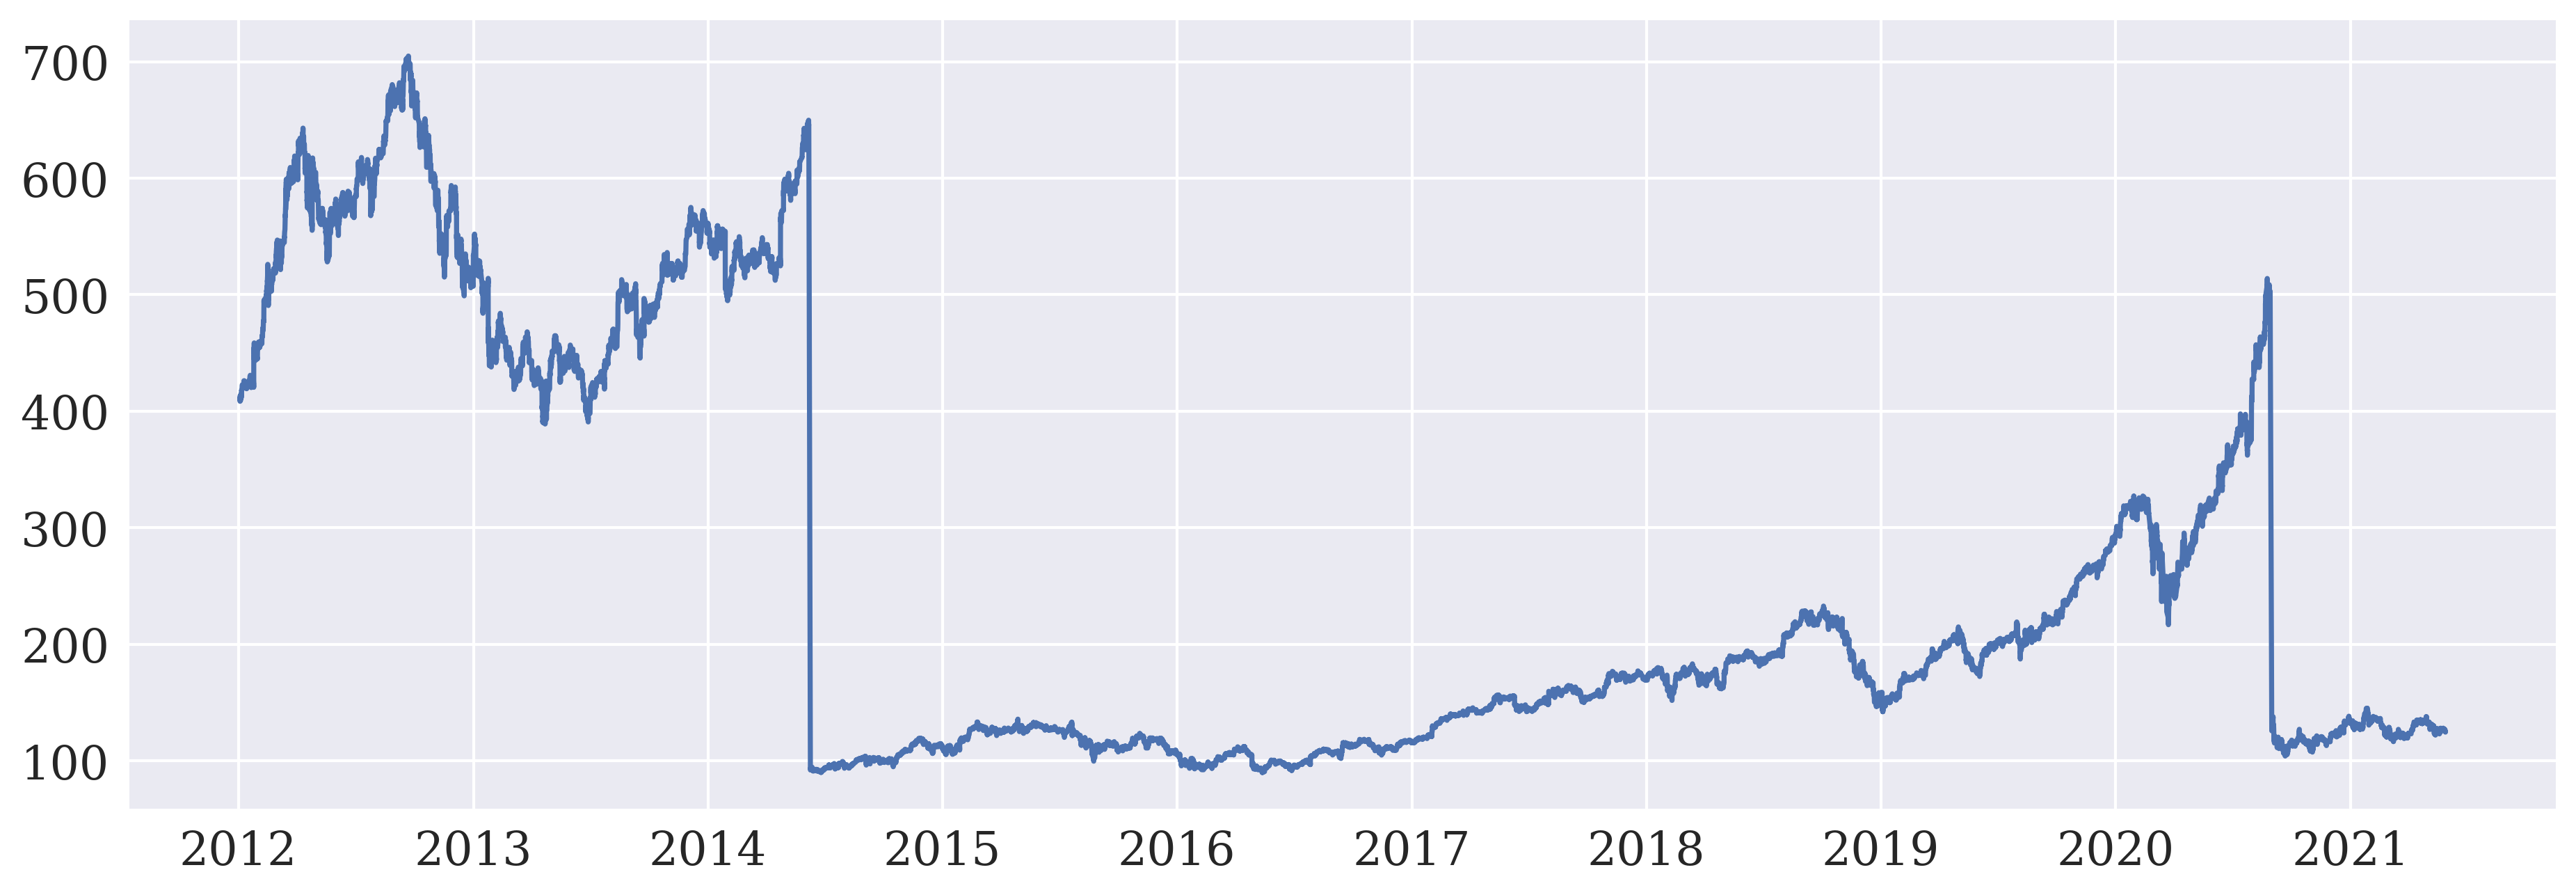

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(data_stock.index, data_stock['close'].values)
plt.grid(True)

In [11]:
counts = barriers.out.value_counts()
counts

 0    14354
-1    12716
 1    10274
Name: out, dtype: int64

In [12]:
counts.sum()

37344

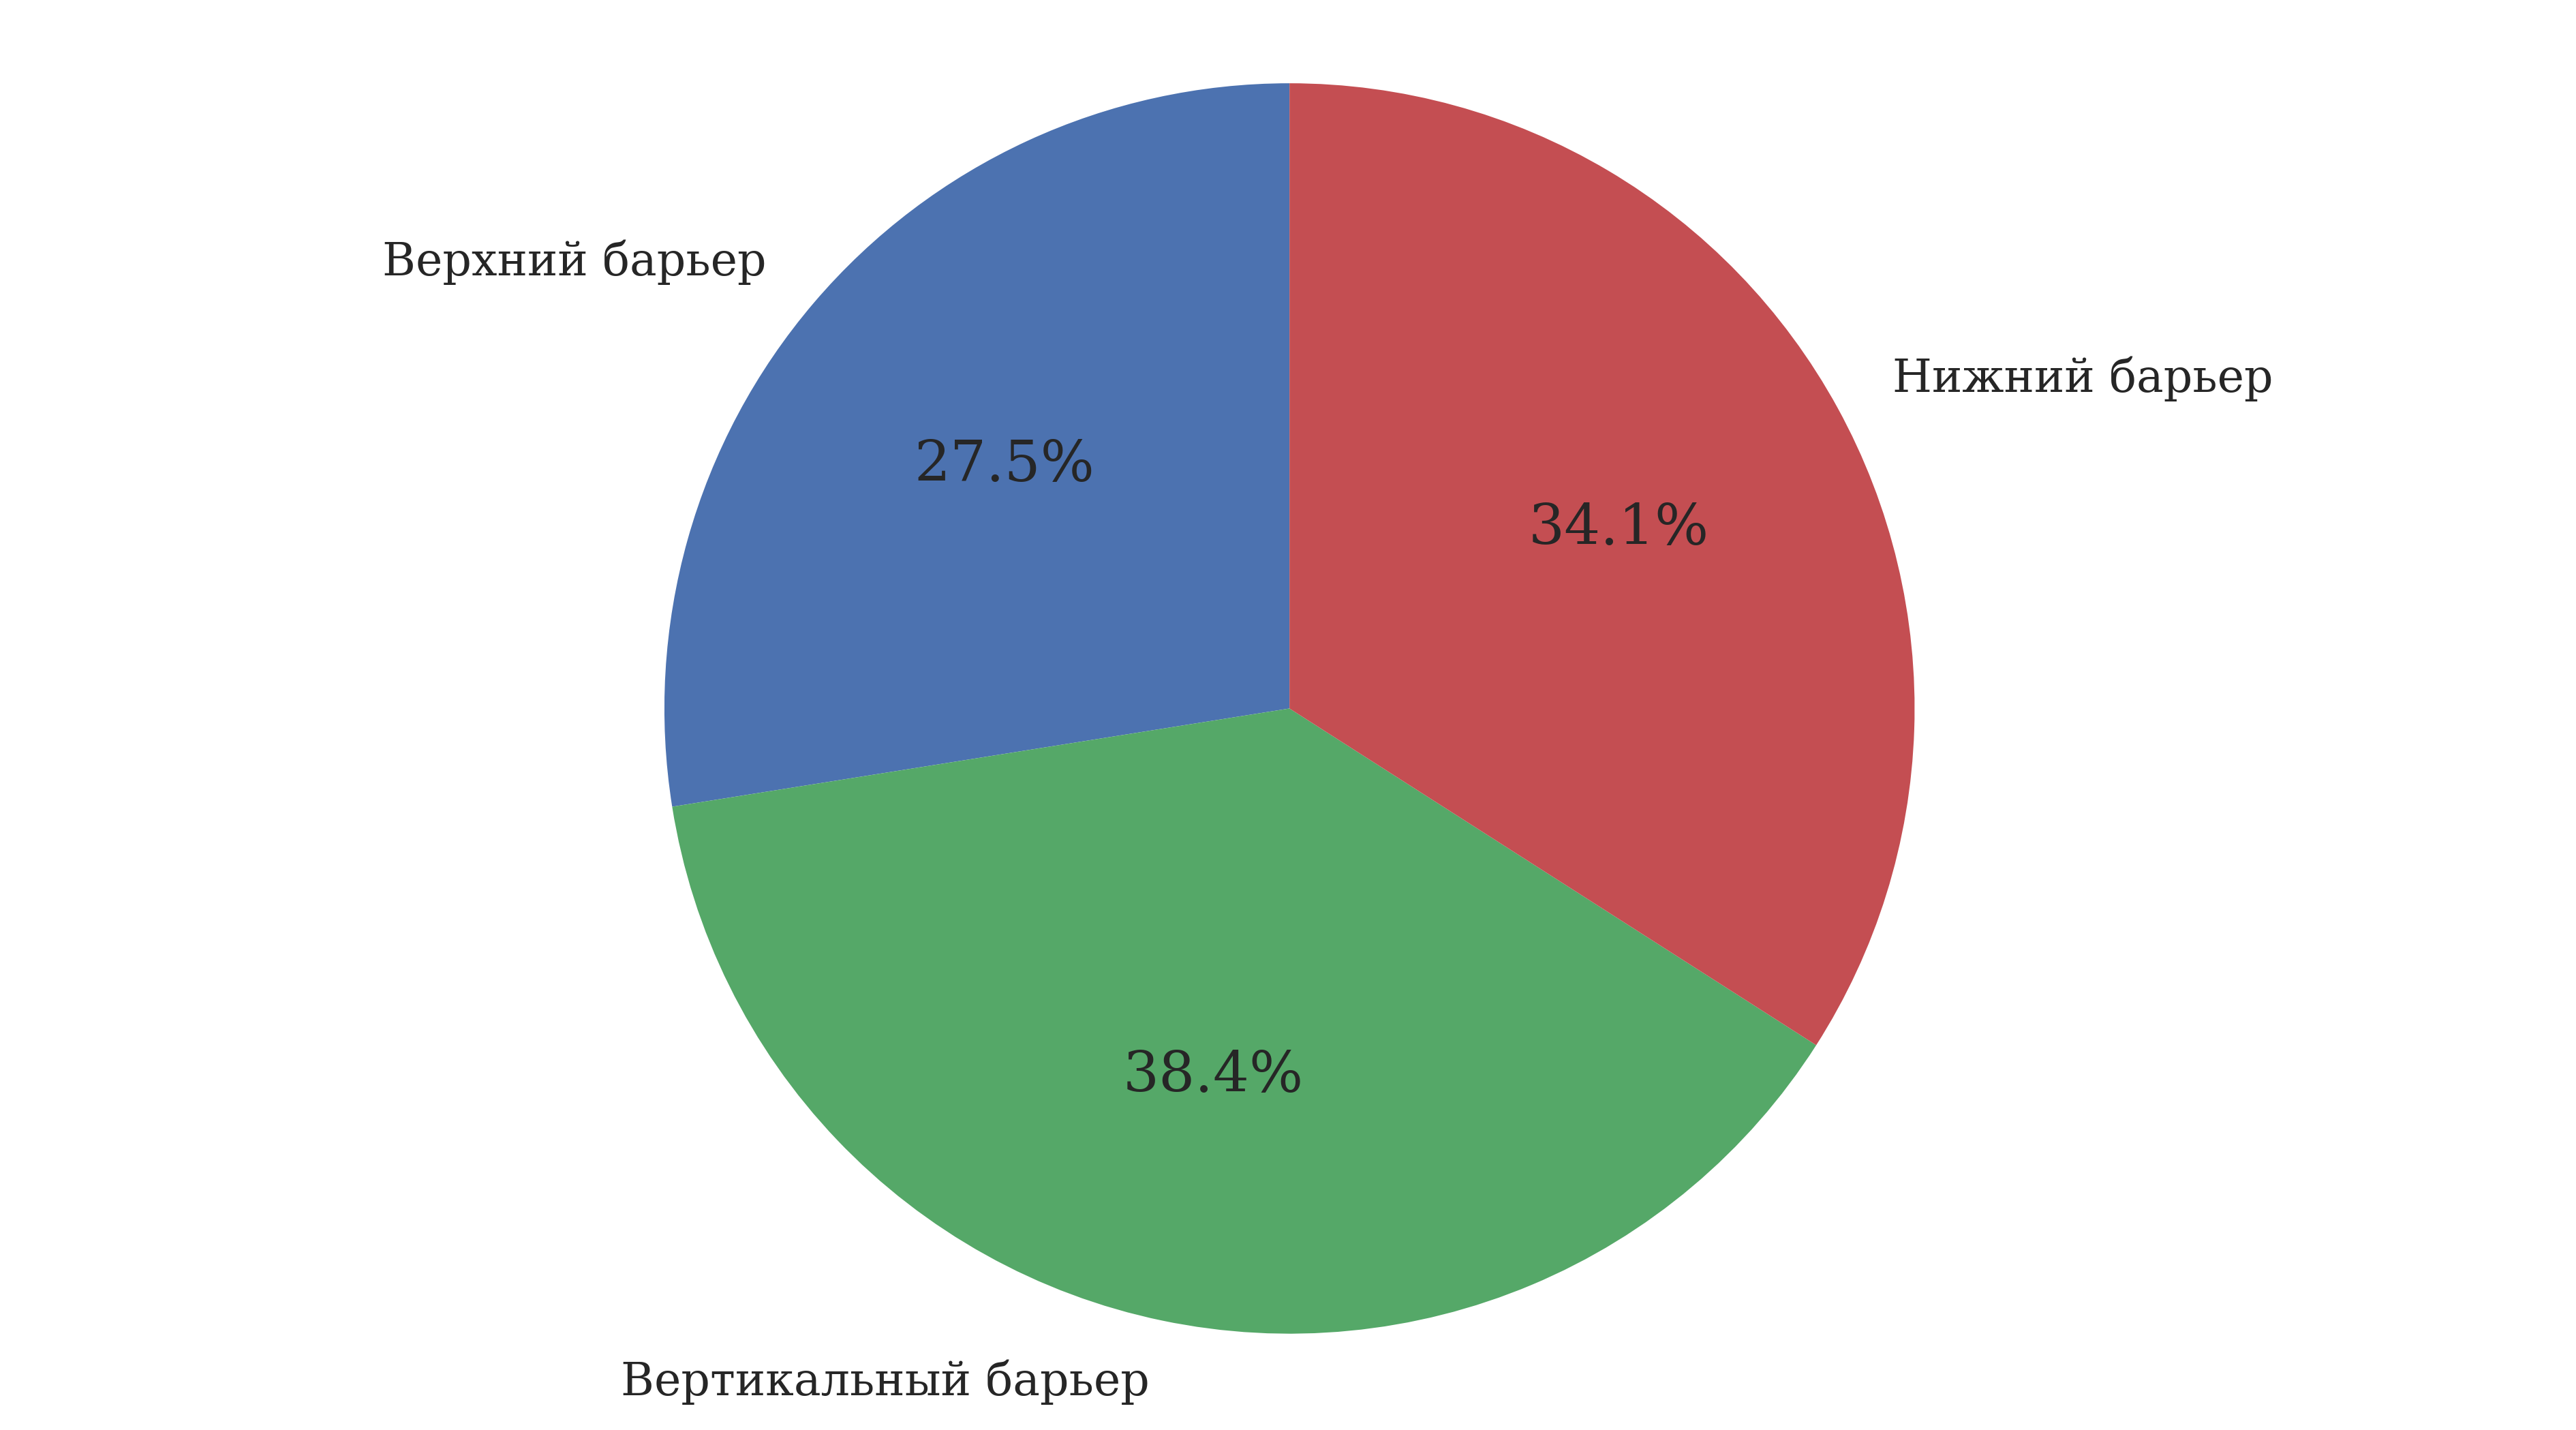

In [13]:
labels = 'Верхний барьер', 'Вертикальный барьер', 'Нижний барьер'
sizes = [(counts[1]*100)/counts.sum(), (counts[0]*100)/counts.sum(), (counts[-1]*100)/counts.sum()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

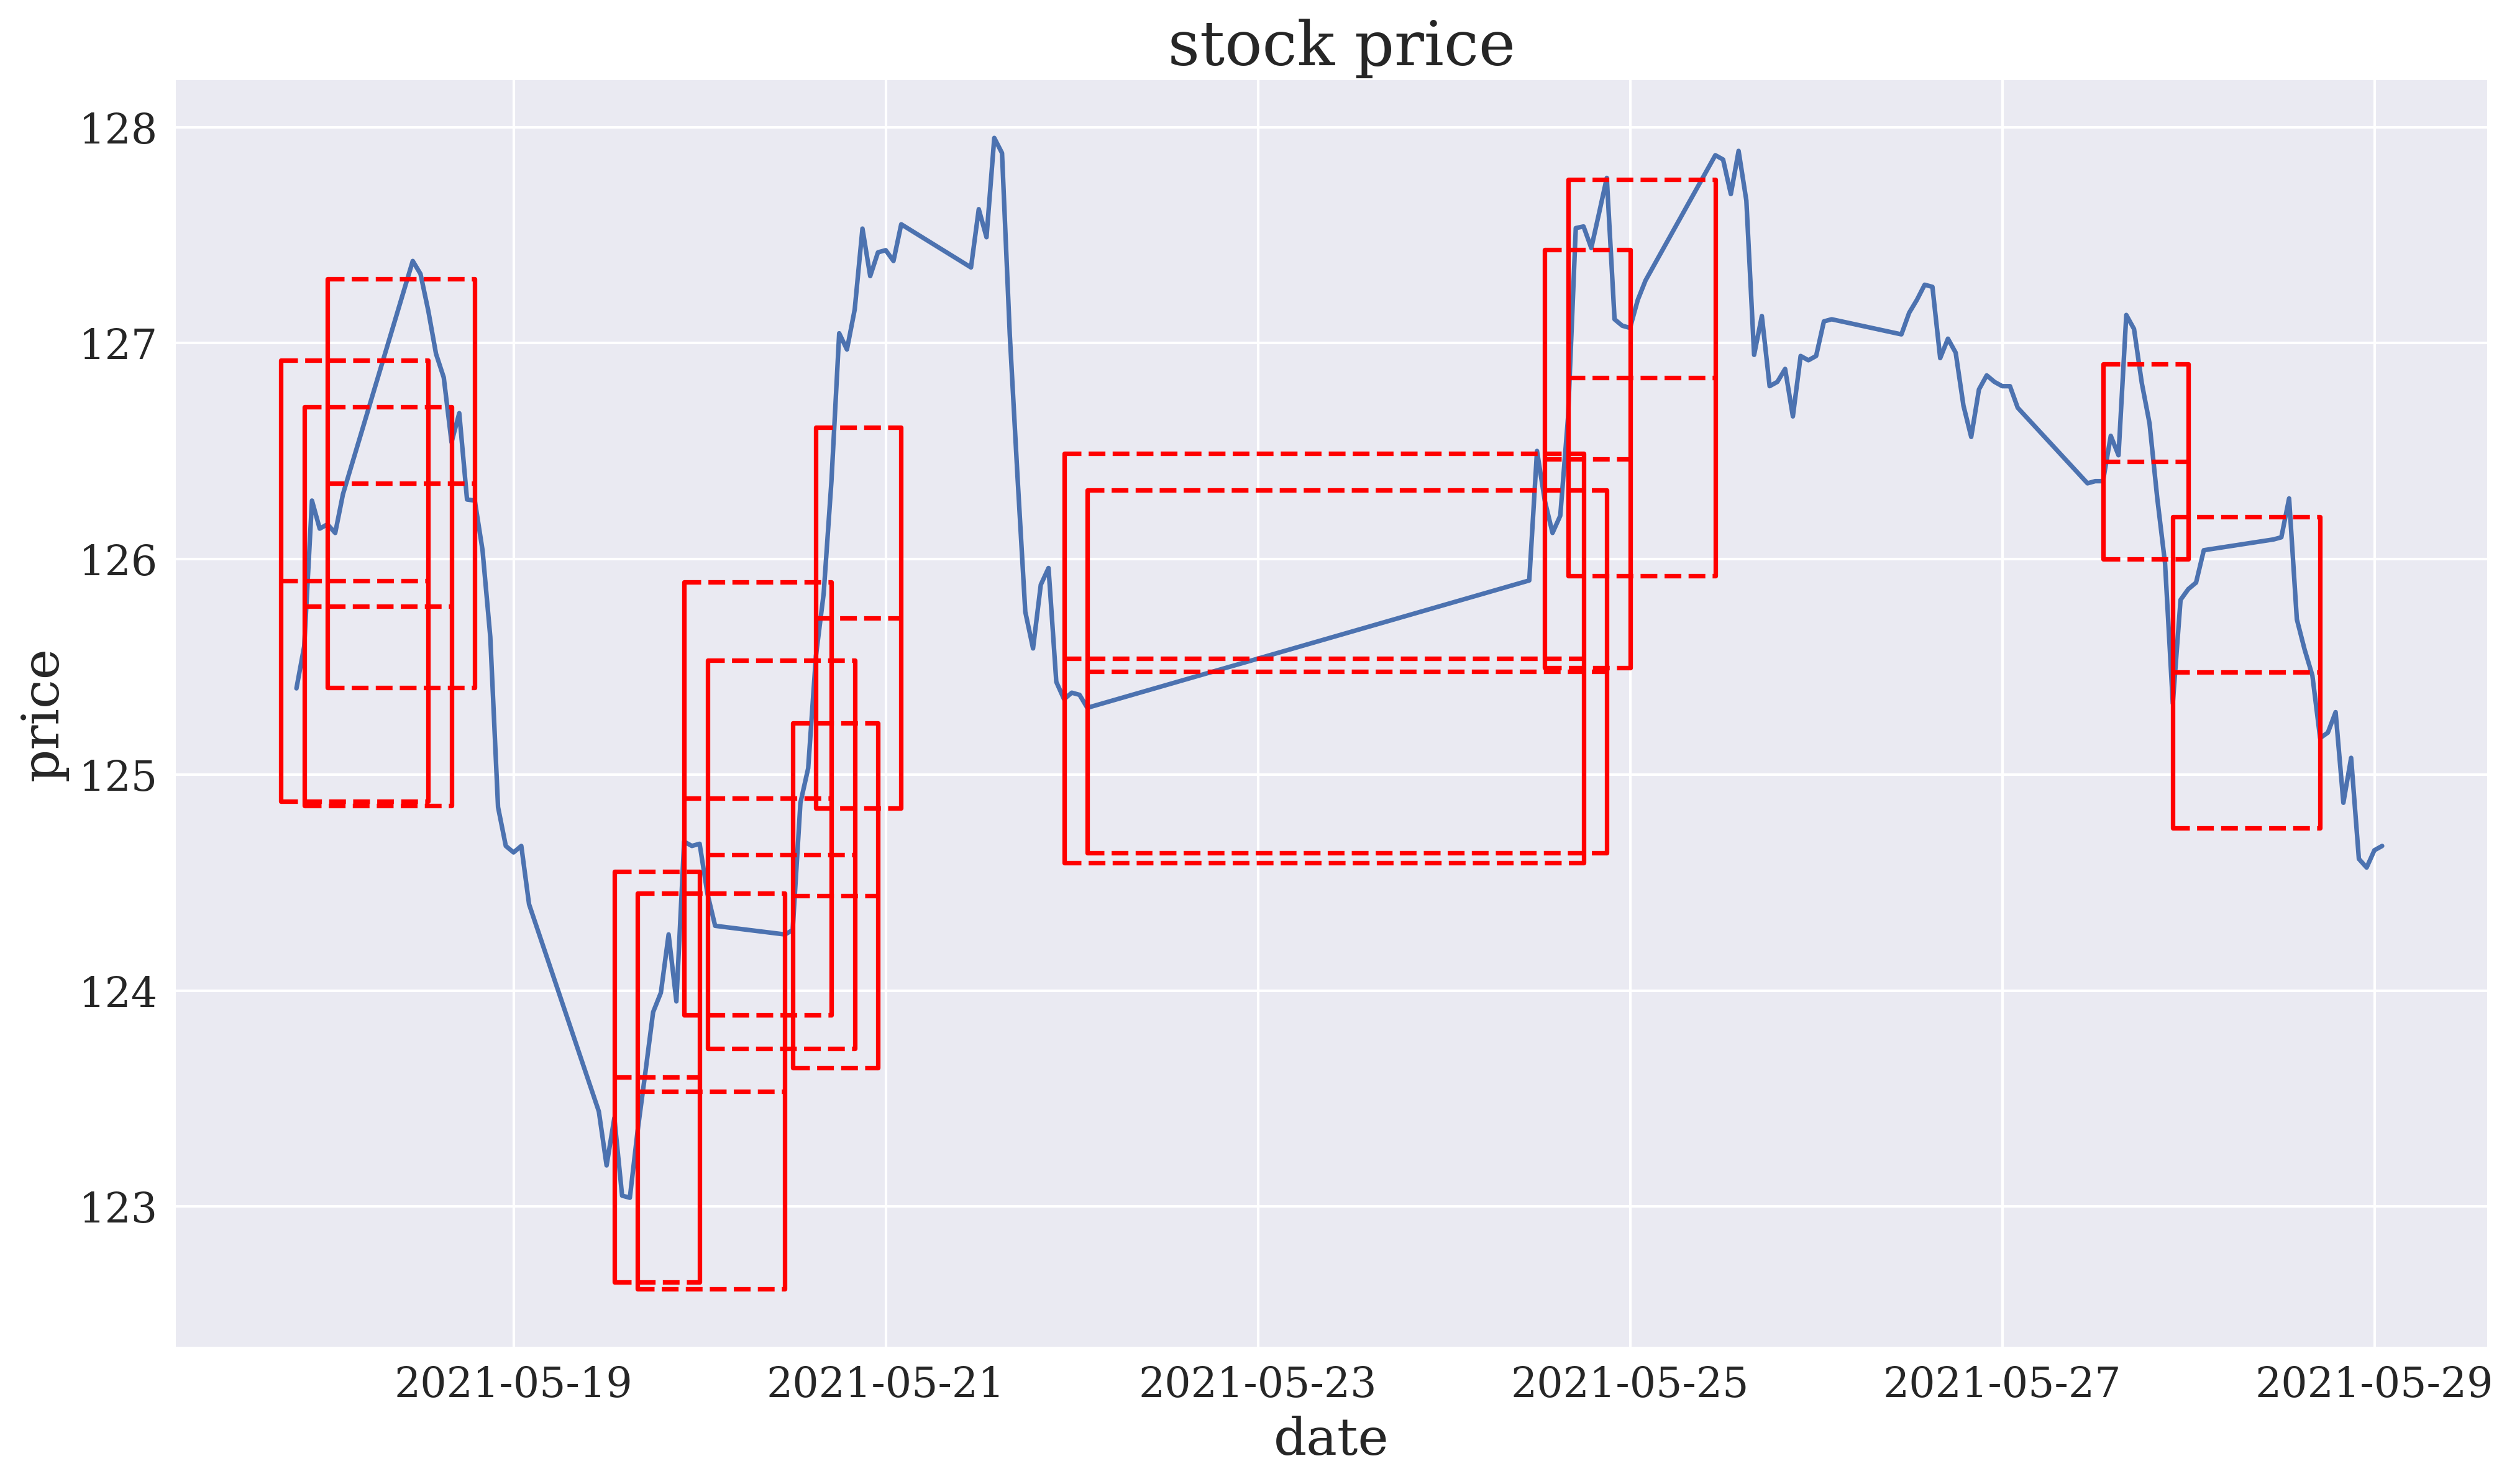

In [14]:
fig,ax = plt.subplots()
ax.set(title=' stock price', xlabel='date', ylabel='price')
ax.plot(barriers.price[-150:])
for i in barriers.index[-155::3]:
    barrier = barriers.loc[i]
    start = i
    end = barrier.vert_barrier
    if not pd.isnull(end) and barrier.out == 1:
        upper_barrier = barrier.top_barrier
        lower_barrier = barrier.bottom_barrier
        ax.plot([start, end], [upper_barrier, upper_barrier], 'r--');
        ax.plot([start, end], [lower_barrier, lower_barrier], 'r--');
        ax.plot([start, end], [(lower_barrier + upper_barrier)*0.5, (lower_barrier + upper_barrier)*0.5], 'r--');
        ax.plot([start, start], [lower_barrier, upper_barrier], 'r-');
        ax.plot([end, end], [lower_barrier, upper_barrier], 'r-');

In [15]:
def create_HLCV(i): 
    df = pd.DataFrame(index=data_stock.index)
    df[f'high_{i}'] = data_stock.high.rolling(i).max()
    df[f'low_{i}'] = data_stock.low.rolling(i).min()
    df[f'close_{i}'] = data_stock.close.rolling(i).\
                        apply(lambda x:x[-1]) 
    df[f'volume_{i}'] = data_stock.volume.rolling(i).sum()
    df[f'rsi_{i}'] = talib.RSI(data_stock['close']).rolling(i).mean()
    
    return df

In [16]:
def create_features(i):
    df = create_HLCV(i)
    high = df[f'high_{i}'] + 0.00001
    low = df[f'low_{i}']
    close = df[f'close_{i}']
    volume = df[f'volume_{i}']
    rsi = df[f'rsi_{i}']
    features = pd.DataFrame(index=data_stock.index)
    features[f'volume_{i}'] = volume
    features[f'price_spread_{i}'] = high - low
    features[f'close_loc_{i}'] = (high - close) / (high  - low)
    features[f'close_change_{i}'] = close.diff()
    features[f'rsi_{i}'] = rsi
        
    return features

In [17]:
def create_bunch_of_features():
    periods = [1,2,3,5,6,7,8,9,10,20,40,60]
    bunch_of_features = pd.DataFrame(index=data_stock.index)
    for period in periods:
        f = create_features(period)
        bunch_of_features = bunch_of_features.join(f)

    bunch_of_features['hour'] = data_stock.index.hour
    return bunch_of_features

bunch_of_features = create_bunch_of_features()
bunch_of_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37357 entries, 2012-01-03 12:00:00 to 2021-05-29 01:00:00
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   volume_1         37357 non-null  float64
 1   price_spread_1   37357 non-null  float64
 2   close_loc_1      37357 non-null  float64
 3   close_change_1   37356 non-null  float64
 4   rsi_1            37343 non-null  float64
 5   volume_2         37356 non-null  float64
 6   price_spread_2   37356 non-null  float64
 7   close_loc_2      37356 non-null  float64
 8   close_change_2   37355 non-null  float64
 9   rsi_2            37342 non-null  float64
 10  volume_3         37355 non-null  float64
 11  price_spread_3   37355 non-null  float64
 12  close_loc_3      37355 non-null  float64
 13  close_change_3   37354 non-null  float64
 14  rsi_3            37341 non-null  float64
 15  volume_5         37353 non-null  float64
 16  price_spread_5   37353 

In [18]:
dropna_barriers = barriers.dropna()
data = bunch_of_features[60:-13].assign(out=dropna_barriers[58:-2].out)
data.dropna(inplace=True)
out = data.out
out=out.astype('int')
data.drop('out', axis=1, inplace=True)
data

,volume_1,price_spread_1,close_loc_1,close_change_1,rsi_1,volume_2,price_spread_2,close_loc_2,close_change_2,rsi_2,...,price_spread_40,close_loc_40,close_change_40,rsi_40,volume_60,price_spread_60,close_loc_60,close_change_60,rsi_60,hour
2012-01-09 23:00:00,1793091.0,4.19511,0.949942,-1.4600,49.362575,2942905.0,4.19511,0.949942,-1.4600,53.014546,...,16.75001,0.359403,-1.4600,68.200032,43175690.0,19.20001,0.313542,-1.4600,62.093108,23
2012-01-10 00:00:00,45982.0,3.50001,0.860000,0.2600,50.584101,1839073.0,4.21511,0.883752,0.2600,49.973338,...,16.00001,0.360000,0.2600,68.371229,43216483.0,19.20001,0.300000,0.2600,62.208871,0
2012-01-10 01:00:00,8164.0,0.87001,0.505753,-0.3100,49.064358,54146.0,3.75001,0.885334,-0.3100,49.824230,...,15.08001,0.402520,-0.3100,68.240795,43221629.0,19.20001,0.316146,-0.3100,62.298424,1
2012-01-10 02:00:00,7855.0,0.86001,0.023267,0.7500,52.762055,16019.0,1.20001,0.016675,0.7500,50.913207,...,15.08001,0.352786,0.7500,68.064337,43229384.0,19.20001,0.277084,0.7500,62.535819,2
2012-01-10 03:00:00,9852.0,0.75001,0.466674,0.4200,54.743418,17707.0,1.61001,0.217396,0.4200,53.752737,...,13.85001,0.353791,0.4200,67.996318,43238636.0,19.20001,0.255209,0.4200,62.807465,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28 00:00:00,811465.0,0.62001,0.064531,0.0500,39.028727,8806214.0,0.62001,0.064531,0.0500,38.536448,...,2.56001,0.695314,0.0500,45.924188,250816399.0,3.24001,0.759260,0.0500,50.350952,0
2021-05-28 01:00:00,44693.0,0.09001,0.444506,0.0300,39.648431,856158.0,0.65001,0.061553,0.0300,39.338579,...,2.56001,0.683595,0.0300,45.647874,250848009.0,3.24001,0.750001,0.0300,50.141045,1
2021-05-28 02:00:00,81756.0,0.21001,0.047188,0.1501,42.781975,126449.0,0.21001,0.047188,0.1501,41.215203,...,2.56001,0.624962,0.1501,45.559991,250784602.0,3.24001,0.703674,0.1501,50.016888,2
2021-05-28 11:00:00,11568.0,0.18001,0.500028,0.0499,43.826180,93324.0,0.34001,0.264728,0.0499,43.304077,...,2.56001,0.605470,0.0499,45.490529,250426609.0,3.24001,0.688273,0.0499,49.892189,11


In [19]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=20)

model.fit(data, out)

Learning rate set to 0.5
0:	learn: 1.0699337	total: 94.4ms	remaining: 1.79s
1:	learn: 1.0623115	total: 120ms	remaining: 1.08s
2:	learn: 1.0556140	total: 145ms	remaining: 821ms
3:	learn: 1.0506449	total: 172ms	remaining: 686ms
4:	learn: 1.0476761	total: 195ms	remaining: 586ms
5:	learn: 1.0463477	total: 221ms	remaining: 517ms
6:	learn: 1.0425231	total: 245ms	remaining: 456ms
7:	learn: 1.0388494	total: 271ms	remaining: 407ms
8:	learn: 1.0340264	total: 298ms	remaining: 364ms
9:	learn: 1.0315858	total: 322ms	remaining: 322ms
10:	learn: 1.0281948	total: 346ms	remaining: 283ms
11:	learn: 1.0260285	total: 369ms	remaining: 246ms
12:	learn: 1.0224569	total: 393ms	remaining: 212ms
13:	learn: 1.0203749	total: 419ms	remaining: 180ms
14:	learn: 1.0187687	total: 443ms	remaining: 148ms
15:	learn: 1.0154974	total: 466ms	remaining: 116ms
16:	learn: 1.0121191	total: 490ms	remaining: 86.4ms
17:	learn: 1.0109710	total: 512ms	remaining: 56.9ms
18:	learn: 1.0089090	total: 535ms	remaining: 28.2ms
19:	learn: 1

In [20]:
predictions = model.predict(bunch_of_features[-30:])

In [21]:
predictions

array([[-1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1]])

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample', criterion="entropy")
clf.fit(data, out)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000)

In [23]:
predictions2 = clf.predict(bunch_of_features.iloc[-30:])

In [24]:
predictions2

array([ 1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1, -1,  1])

In [25]:
predictions2[-10]

-1

In [26]:
new_barriers = barriers[-30:].assign(predictions_out1=predictions[:,0])
new_barriers = new_barriers.assign(predictions_out2=predictions2)
new_barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out,predictions_out1,predictions_out2
2021-05-27 12:00:00,37326,126.36,2021-05-27 23:00:00,126.924815,125.983457,1,-1,1
2021-05-27 13:00:00,37327,126.36,2021-05-28 00:00:00,126.902787,125.998142,1,-1,1
2021-05-27 14:00:00,37328,126.57,2021-05-28 01:00:00,127.130612,126.196259,-1,-1,-1
2021-05-27 15:00:00,37329,126.48,2021-05-28 02:00:00,127.020718,126.119522,1,-1,1
2021-05-27 16:00:00,37330,127.1299,2021-05-28 11:00:00,127.896764,126.618657,-1,0,-1
2021-05-27 17:00:00,37331,127.065,2021-05-28 12:00:00,127.804469,126.572021,-1,0,-1
2021-05-27 18:00:00,37332,126.815,2021-05-28 13:00:00,127.558287,126.319475,-1,0,-1
2021-05-27 19:00:00,37333,126.6277,2021-05-28 14:00:00,127.356603,126.141765,-1,0,-1
2021-05-27 20:00:00,37334,126.28,2021-05-28 15:00:00,127.030189,125.779874,-1,0,-1
2021-05-27 21:00:00,37335,125.98,2021-05-28 16:00:00,126.729456,125.480363,-1,0,-1


In [27]:
new_barriers.to_excel('/Users/germanignatovich/Desktop/work/Диплом/excel/%s.xlsx' % new_barriers.index[-1].strftime("%Y-%m-%d_%H:%M:%S"))

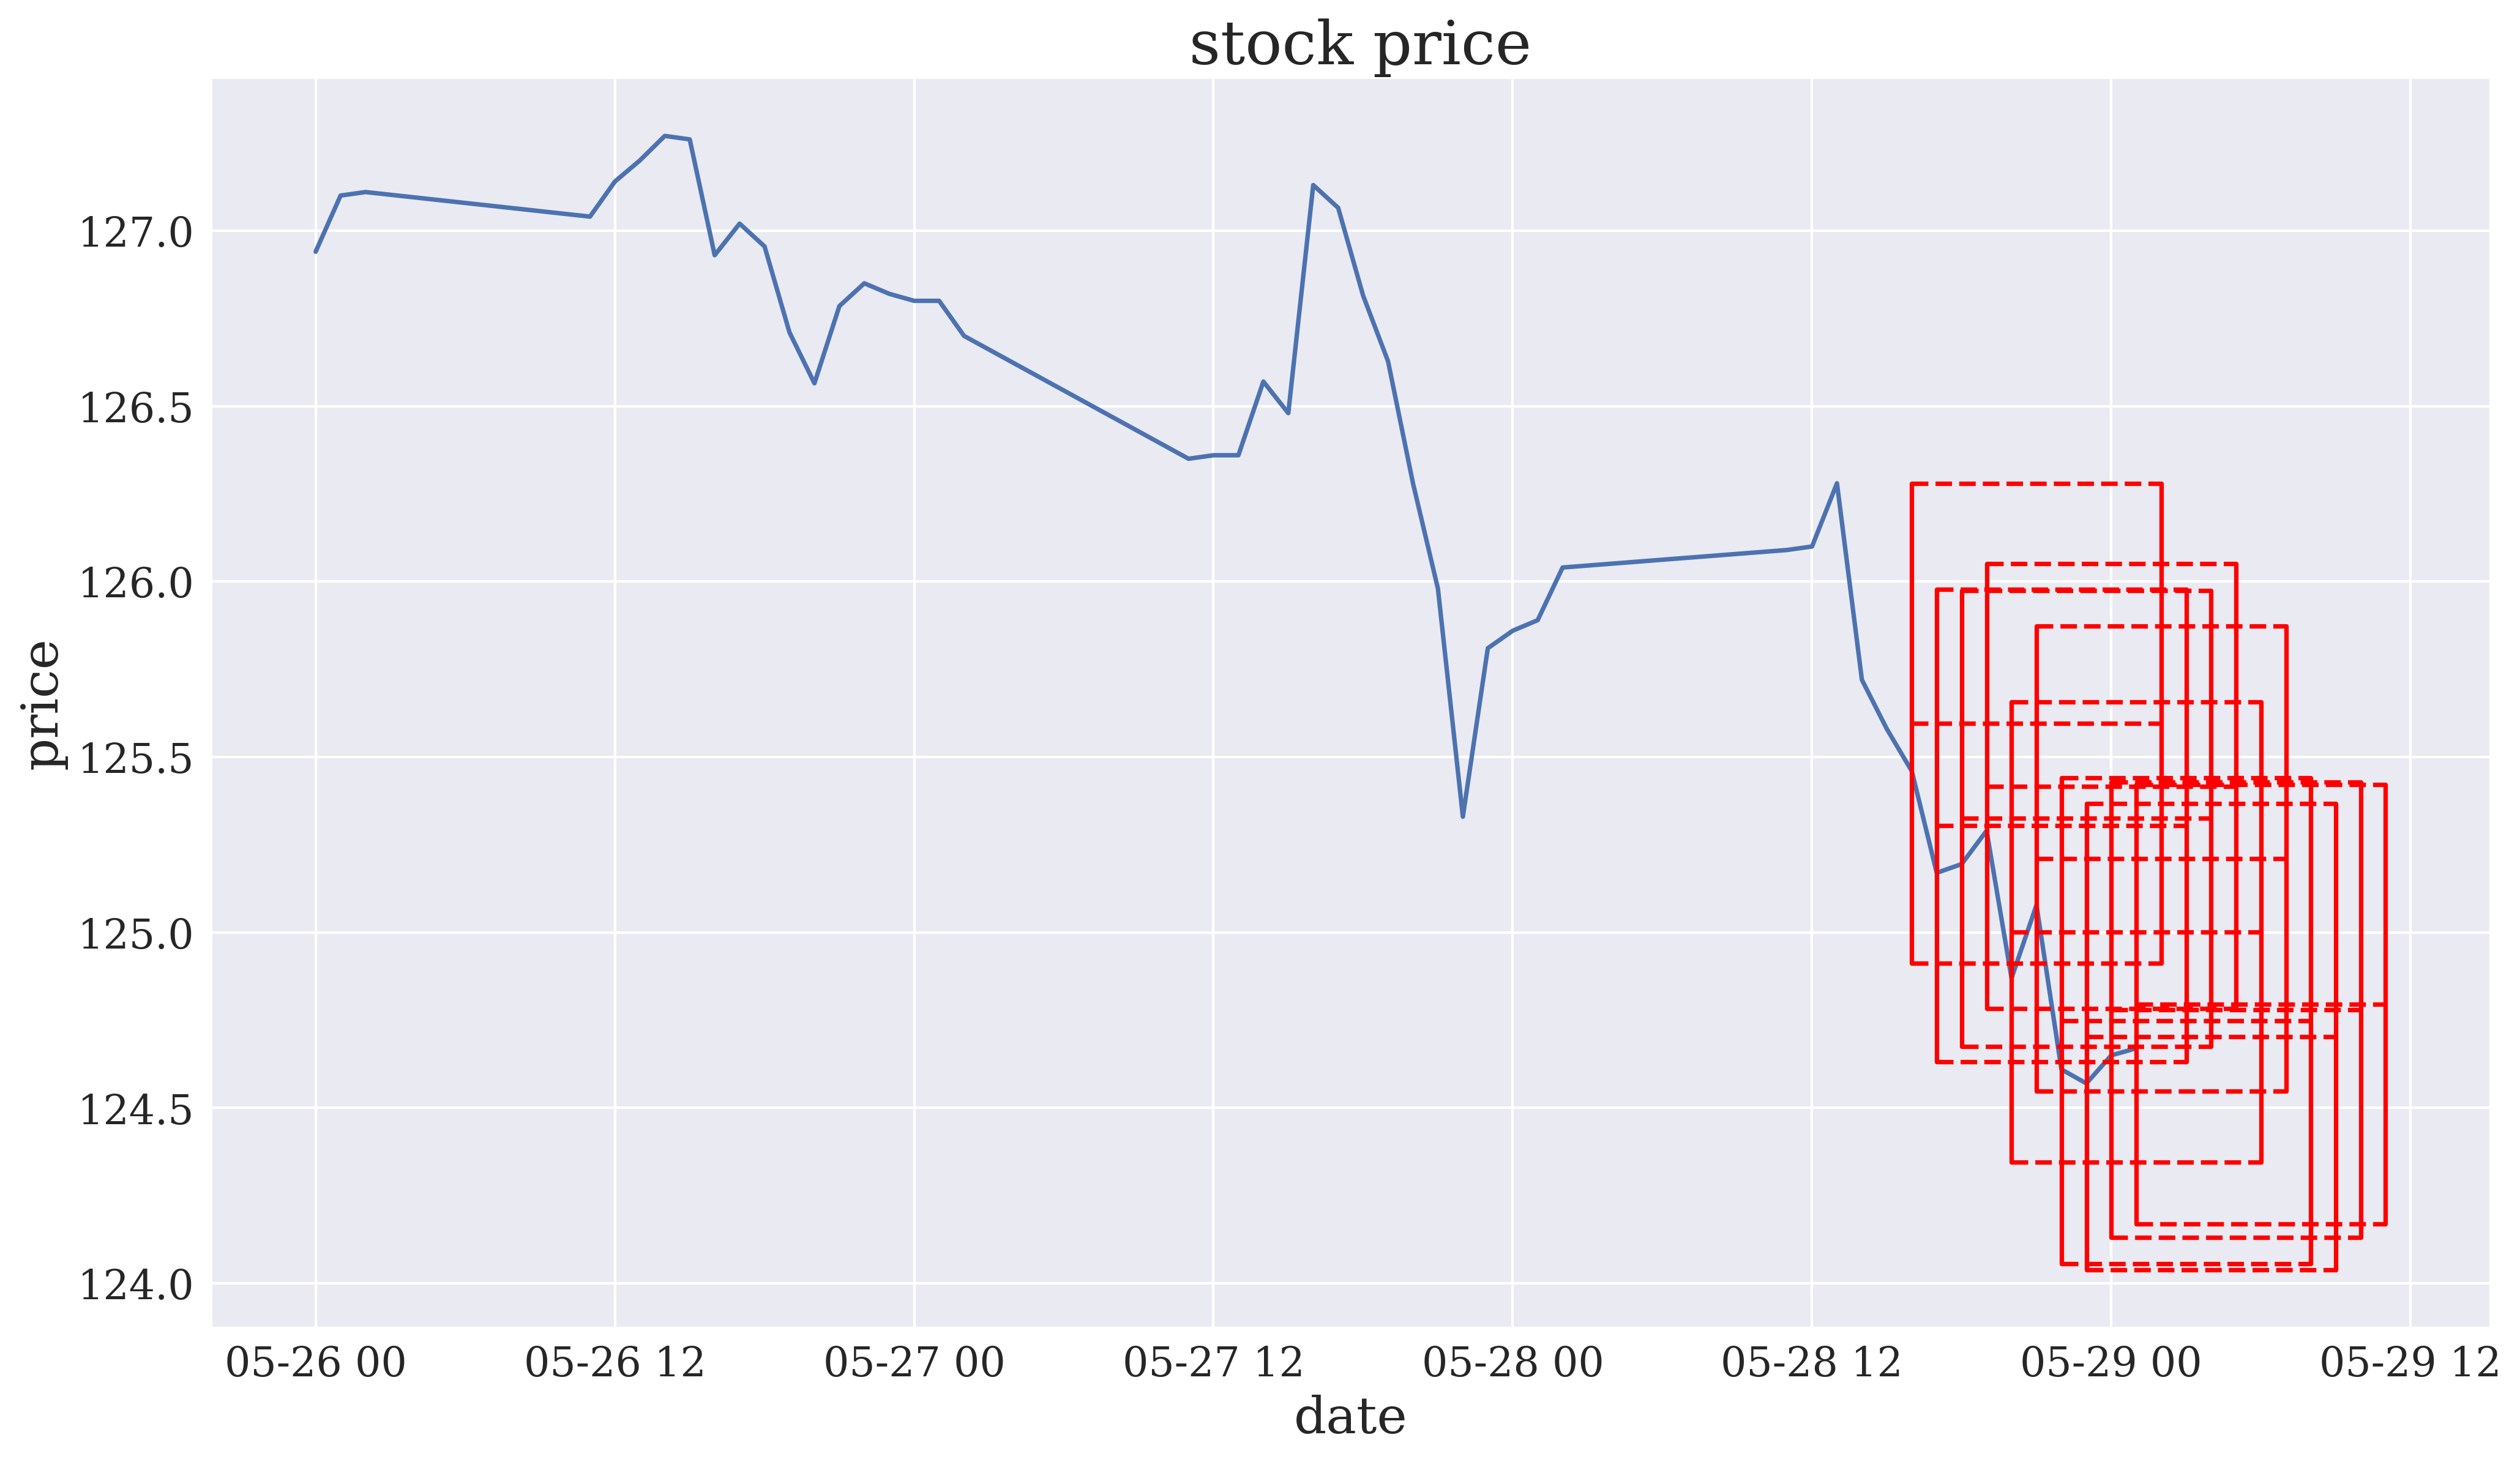

In [28]:
fig,ax = plt.subplots()
ax.set(title=' stock price', xlabel='date', ylabel='price')
ax.plot(barriers.price[-50:])
for i in barriers.index[-10:]:
    barrier = barriers.loc[i]
    start = i
    end = (datetime.strptime(i.strftime("%Y-%m-%d %H:%M:%S"), '%Y-%m-%d %H:%M:%S') + timedelta(hours = 10))
    upper_barrier = barrier.top_barrier
    lower_barrier = barrier.bottom_barrier
    ax.plot([start, end], [upper_barrier, upper_barrier], 'r--');
    ax.plot([start, end], [lower_barrier, lower_barrier], 'r--');
    ax.plot([start, end], [(lower_barrier + upper_barrier)*0.5, (lower_barrier + upper_barrier)*0.5], 'r--');
    ax.plot([start, start], [lower_barrier, upper_barrier], 'r-');
    ax.plot([end, end], [lower_barrier, upper_barrier], 'r-');

In [29]:
datetime.now().hour

18

In [30]:
data_stock.index.hour

Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            ...
            16, 17, 18, 19, 20, 21, 22, 23,  0,  1],
           dtype='int64', length=37357)

In [31]:
data_stock.index = data_stock.index + timedelta(hours = 4)

In [32]:
data_stock

,volume,vw,open,close,high,low,number
2012-01-03 16:00:00,4179.0,409.5173,404.8000,412.8000,412.80,404.8000,16
2012-01-03 17:00:00,1965.0,411.3824,412.6500,411.3300,412.65,411.0000,15
2012-01-03 18:00:00,5138.0,411.0556,411.3300,410.5000,412.00,410.4700,21
2012-01-03 19:00:00,24959.0,409.8962,410.9900,409.6200,410.99,409.5500,136
2012-01-03 20:00:00,119362.0,408.0616,410.5000,408.5000,410.50,405.0000,515
...,...,...,...,...,...,...,...
2021-05-29 01:00:00,5555575.0,125.0000,124.8800,125.0782,125.14,124.8118,41542
2021-05-29 02:00:00,13615951.0,124.9053,125.0750,124.6100,125.17,124.5500,101017
2021-05-29 03:00:00,1300112.0,124.6190,124.6100,124.5700,124.82,124.5200,5044
2021-05-29 04:00:00,123593.0,124.5874,124.5800,124.6500,124.67,124.5700,2289


In [33]:
(data_stock.high + 0.00001 - data_stock.low == 0).any()

False

In [34]:
talib.RSI(data_stock['close']).rolling(3).mean()

2012-01-03 16:00:00          NaN
2012-01-03 17:00:00          NaN
2012-01-03 18:00:00          NaN
2012-01-03 19:00:00          NaN
2012-01-03 20:00:00          NaN
                         ...    
2021-05-29 01:00:00    33.121923
2021-05-29 02:00:00    31.361751
2021-05-29 03:00:00    31.194844
2021-05-29 04:00:00    29.980787
2021-05-29 05:00:00    30.699324
Length: 37357, dtype: float64